# <div style="color:white;display:fill;border-radius:5px;background-color:#560BAD;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Exploratory Data Analysis</p></div> 

In exploratory data analysis we must analyze as much as we can, doing detective work. However, our objective specifically in this project is about cancellation, so the analysis will be focused on that.

- **Exploratory Data Analysis** 
    - Libraries
    - Configurations
    - Hypothesis
    - Mind Map Business
    - Summary Table
    - Bivariate Analysis
         - Cancelations by Hotel
         - Cancelations by Month
         - Cancelations by Lead Time
         - Cancelations by Country
         - Cancelations by Market Segment
         - Cancelations by Agency
         - Cancelations by Company
         - Cancelations by Deposit Type
         - About ADR

## <div style="color:white;display:fill;border-radius:5px;background-color:#3F37C9;letter-spacing:0.5px;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Libraries</p></div>

In [1]:
#!pip install sort-dataframeby-monthorweek
#!pip install sorted-months-weekdays
#!pip install calplot

In [2]:
# Basic Tools
import numpy as np
import pandas as pd
from datetime import datetime as dt

# Visualization Tools
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
from PIL import Image
from IPython.display import display

#Ordering by Month instead of alphabetical order
import sort_dataframeby_monthorweek as sd

In [3]:
ROOT_DIR = '/home/alysson/projects/Hotel-Booking-Cancelations'
data = pd.read_csv(f'{ROOT_DIR}/data/data_processed/data_processed.csv')

In [4]:
data.shape

(87245, 37)

## <div style="color:white;display:fill;border-radius:5px;background-color:#3F37C9;letter-spacing:0.5px;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Configurations</p></div>

In [5]:
def pandas_settings():
    pd.options.display.float_format = '{:,.4f}'.format
    pd.set_option('display.expand_frame_repr', False )
    pd.set_option('display.max_columns', 35)
    pd.set_option('display.max_rows', 50)
    

pandas_settings()

In [106]:
def plot_settings():  
    
    #plt.style.use('whitegrid')
    # Set Matplotlib defaults
    plt.rc('figure', figsize=(16,8))
    #plt.rc('axes', labelweight='bold', labelsize='large', titleweight='bold', titlesize=14, titlepad=10)
    plt.rc('animation', html='html5')
    plt.rc('axes',titlesize=14)
    rcParams['axes.spines.top'] = False
    rcParams['axes.spines.right'] = False
    
    #%config InlineBackend.figure_format='retina'
    sns.set(style='whitegrid')#palette='muted', , font_scale=1.2
    #HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
    #HAPPY_COLORS_PALETTE = ["#f72585", "#b5179e", "#560bad", "#3a0ca3", "#3f37c9", "#4361ee", "#4895ef", "#4cc9f0"]
    HAPPY_COLORS_PALETTE = ["#f72585", "#560bad", "#3f37c9", "#4361ee", "#4cc9f0"]
    sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
    
plot_settings()

In [7]:
#Ordering by Month instead of alphabetical order
def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [8]:
def summary_stats(df):
    numerical_features = df.select_dtypes(include = 'number').columns.values
    df = df[numerical_features]
    
    count_ = pd.DataFrame(df.apply(np.size))
    #pct_ = pd.DataFrame(df.apply(np.size)/len(data_raw)*100)
    pct_ = pd.DataFrame(df.apply(np.size)/len(data)*100)
    sum_ = pd.DataFrame(df.apply(np.sum))
    mean_ = pd.DataFrame(df.apply(np.mean))
    std_ = pd.DataFrame(df.apply(np.std))
    median_ = pd.DataFrame(df.apply(np.median))
    
    min_ = pd.DataFrame(df.apply(min))
    max_ = pd.DataFrame(df.apply(max))
    range_ = pd.DataFrame(df.apply(lambda x: x.max() - x.min()))
    q1_ = pd.DataFrame(df.apply(lambda x: np.percentile(x,25)))
    q3_ = pd.DataFrame(df.apply(lambda x: np.percentile(x,75)))
    
    skewness_= pd.DataFrame(df.apply(lambda x: x.skew()))
    kurtosis_ = pd.DataFrame(df.apply(lambda x: x.kurtosis()))
    
    summary = pd.concat([count_, pct_, mean_, std_, median_, sum_, min_, max_, range_, q1_,q3_, skewness_, kurtosis_],axis=1)
    summary.columns = ['counts', 'pct_raw','mean','std','median','sum','min','max', 'range', '25%','75%', 'skew', 'kur']
 

    cm = sns.light_palette("#4cc9f0", as_cmap = True)
    
    display(summary.style.format('{:.2f}').background_gradient(subset=(summary.index[3:],summary.columns[:]),cmap=cm))

## <div style="color:white;display:fill;border-radius:5px;background-color:#3F37C9;letter-spacing:0.5px;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Hypothesis</p></div>

**Hypothesis about cancellations**

Some hypotheses were raised in meetings previously scheduled by the business team and data scientists, among the most interesting are:

- H1: The difference between cancellation rate of urban and resort hotels is greater than 5%.
- H2: The cancellations rate during low season is higher than high season.
- H3: People with lead time of more than 10 days cancel more than people with lead time of less than 10 days.
- H4: People who requires at least one special requests cancel less.
- H5: People who have a previous cancellation history cancel more.
- H6: The difference in cancellations rate between the top 10 agencies with the most bookings is less than 10%.
- H7: The avarage days stay for resort hotel is around a week and City hotel around 2 days.
- H8: The adr at the Resort Hotel is higher than at the City Hotel throughout the year

In [9]:
# img = Image.open(f'{ROOT_DIR}/images/mind_map.png')
# img

## <div style="color:white;display:fill;border-radius:5px;background-color:#3F37C9;letter-spacing:0.5px;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Summary Table</p></div>

In [10]:
rh = data.loc[(data["hotel"] == "Resort Hotel")]
ch = data.loc[(data["hotel"] == "City Hotel")]

In [11]:
summary_stats(rh)

,counts,pct_raw,mean,std,median,sum,min,max,range,25%,75%,skew,kur
is_canceled,33957.00,38.92,0.23,0.42,0.00,7976.00,0.00,1.00,1.00,0.00,0.00,1.25,-0.44
lead_time,33957.00,38.92,83.38,91.80,47.00,2831319.00,0.00,737.00,737.00,8.00,138.00,1.24,1.01
arrival_date_year,33957.00,38.92,2016.14,0.72,2016.00,68462122.00,2015.00,2017.00,2.00,2016.00,2017.00,-0.22,-1.06
arrival_date_week_number,33957.00,38.92,27.15,13.80,28.00,922026.00,1.00,53.00,52.00,16.00,37.00,-0.03,-0.95
arrival_date_day_of_month,33957.00,38.92,15.91,8.89,16.00,540231.00,1.00,31.00,30.00,8.00,24.00,-0.01,-1.19
stays_in_weekend_nights,33957.00,38.92,1.21,1.16,1.00,41241.00,0.00,19.00,19.00,0.00,2.00,1.41,8.03
stays_in_week_nights,33957.00,38.92,3.18,2.50,3.00,107882.00,0.00,50.00,50.00,1.00,5.00,2.20,15.87
adults,33957.00,38.92,1.88,0.74,2.00,63686.00,0.00,55.00,55.00,2.00,2.00,31.61,1810.75
children,33957.00,38.92,0.15,0.48,0.00,5072.00,0.00,10.00,10.00,0.00,0.00,3.41,14.30
babies,33957.00,38.92,0.02,0.13,0.00,554.00,0.00,2.00,2.00,0.00,0.00,8.01,65.71


In [12]:
summary_stats(ch)

,counts,pct_raw,mean,std,median,sum,min,max,range,25%,75%,skew,kur
is_canceled,53288.00,61.08,0.30,0.46,0.00,16049.00,0.00,1.00,1.00,0.00,1.00,0.87,-1.25
lead_time,53288.00,61.08,77.80,82.13,51.00,4145592.00,0.00,629.00,629.00,14.00,118.00,1.58,3.11
arrival_date_year,53288.00,61.08,2016.25,0.66,2016.00,107442152.00,2015.00,2017.00,2.00,2016.00,2017.00,-0.33,-0.77
arrival_date_week_number,53288.00,61.08,26.63,13.58,27.00,1419166.00,1.00,53.00,52.00,16.00,37.00,0.06,-0.95
arrival_date_day_of_month,53288.00,61.08,15.76,8.80,16.00,839586.00,1.00,31.00,30.00,8.00,23.00,0.01,-1.20
stays_in_weekend_nights,53288.00,61.08,0.87,0.90,1.00,46401.00,0.00,14.00,14.00,0.00,2.00,1.00,3.51
stays_in_week_nights,53288.00,61.08,2.27,1.59,2.00,121031.00,0.00,34.00,34.00,1.00,3.00,2.49,19.69
adults,53288.00,61.08,1.88,0.54,2.00,100249.00,0.00,4.00,4.00,2.00,2.00,-0.24,0.85
children,53288.00,61.08,0.13,0.44,0.00,7044.00,0.00,3.00,3.00,0.00,0.00,3.49,11.57
babies,53288.00,61.08,0.01,0.10,0.00,392.00,0.00,10.00,10.00,0.00,0.00,36.72,2846.57


In [13]:
rh.describe(include="object").T

,count,unique,top,freq
hotel,33957,1,Resort Hotel,33957
arrival_date_month,33957,12,August,4666
meal,33957,4,BB,26746
country,33957,126,PRT,14231
market_segment,33957,6,Online TA,16624
distribution_channel,33957,4,TA/TO,24588
reserved_room_type,33957,10,A,18600
assigned_room_type,33957,11,A,12906
deposit_type,33957,3,No Deposit,33672
customer_type,33957,4,Transient,27341


In [14]:
ch.describe(include="object").T

,count,unique,top,freq
hotel,53288,1,City Hotel,53288
arrival_date_month,53288,12,August,6577
meal,53288,4,BB,41164
country,53288,167,PRT,13133
market_segment,53288,8,Online TA,34932
distribution_channel,53288,5,TA/TO,44452
reserved_room_type,53288,8,A,37840
assigned_room_type,53288,9,A,33382
deposit_type,53288,3,No Deposit,52428
customer_type,53288,4,Transient,44532


**Check**
- negative adr? adr lower than zero?adr equal to 5400?
- zero people?
- reservations with 10 babies/children
- Waiting list of 391 dias?

## <div style="color:white;display:fill;border-radius:5px;background-color:#3F37C9;letter-spacing:0.5px;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Bivariate Analysis</p></div>

### <div style="color:white;display:fill;border-radius:5px;background-color:#4361ee;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Hotel</p></div>

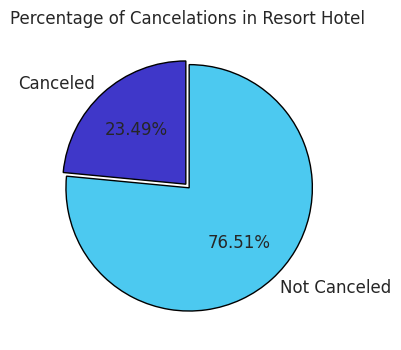

In [15]:
plt.figure(figsize=(4,4))
plt.title('Percentage of Cancelations in Resort Hotel');
plt.pie([len(data.loc[(data.is_canceled == 1) & (data.hotel == 'Resort Hotel')]),
         len(data.loc[(data.is_canceled == 0) & (data.hotel == 'Resort Hotel')])],  
               
        labels = ['Canceled', 'Not Canceled'],
        colors=['#3f37c9','#4cc9f0'],
        explode = (0.02, 0.02),
        startangle=90,
        autopct='%.2f%%',
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black"}, textprops={'fontsize': 12});

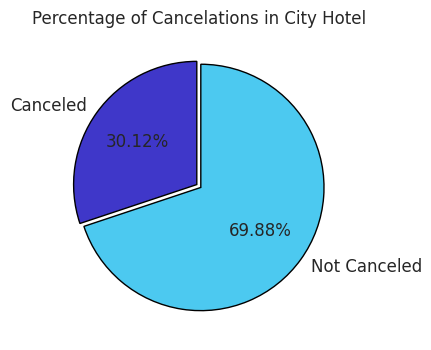

In [16]:
plt.figure(figsize=(4,4))
plt.title('Percentage of Cancelations in City Hotel');
plt.pie([len(data.loc[(data.is_canceled == 1) & (data.hotel == 'City Hotel')]),
         len(data.loc[(data.is_canceled == 0) & (data.hotel == 'City Hotel')])],  
               
        labels = ['Canceled', 'Not Canceled'],
        colors=['#3f37c9','#4cc9f0'],
        explode = (0.02, 0.02),
        startangle=90,
        autopct='%.2f%%',
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black"}, textprops={'fontsize': 12});

**H1:** True, the cancellation rate of the City Hotel is 14% higher than the Resort Hotel.

### <div style="color:white;display:fill;border-radius:5px;background-color:#4361ee;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Month</p></div>

In [17]:
# monthly_cancelations.style.background_gradient(cmap='Blues')

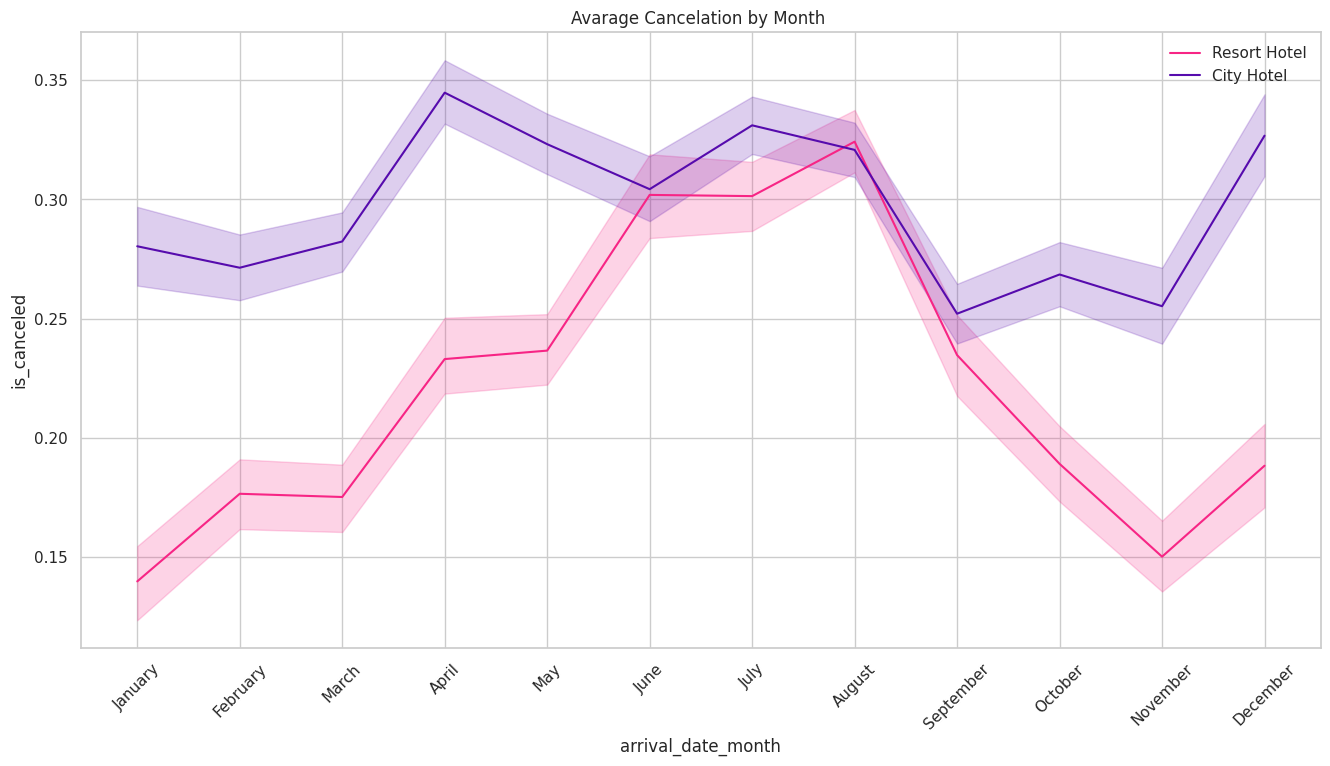

**Obs:** 2015 e 2017 have less records...

### <div style="color:white;display:fill;border-radius:5px;background-color:#4361ee;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Season</p></div>

In [65]:
monthly_cancelations = data.groupby(['arrival_date_month','hotel']).agg( reservations = ('hotel', 'size'),
                                                                         #adr_mean = ('adr', 'mean'),                            
                                                                         canceled_mean = ('is_canceled', 'mean')).reset_index()

monthly_cancelations = sort_month(monthly_cancelations, 'arrival_date_month')

In [66]:
#High Season( June, July, August) no Resort e City Hotel
print('Avarage cancelations during high season - City Hotel:', monthly_cancelations.canceled_mean.loc[(monthly_cancelations['hotel']=='City Hotel') & ((monthly_cancelations['arrival_date_month']=='June') | (monthly_cancelations['arrival_date_month']=='July') | (monthly_cancelations['arrival_date_month']=='August'))].mean())
print('Avarage cancelations during high season - Resort Hotel:', monthly_cancelations.canceled_mean.loc[(monthly_cancelations['hotel']=='Resort Hotel') & ((monthly_cancelations['arrival_date_month']=='June') | (monthly_cancelations['arrival_date_month']=='July') | (monthly_cancelations['arrival_date_month']=='August'))].mean())

Avarage cancelations during high season - City Hotel: 0.3187534023389998
Avarage cancelations during high season - Resort Hotel: 0.3091986410987663


In [67]:
#Low Season( Novembro, Janeiro, Fevereiro, Março) no Resort e City Hotel
print('Avarage cancelations during low season - City Hotel:', monthly_cancelations.canceled_mean.loc[(monthly_cancelations['hotel']=='City Hotel') & ((monthly_cancelations['arrival_date_month']=='November') | (monthly_cancelations['arrival_date_month']=='January') | (monthly_cancelations['arrival_date_month']=='February') | (monthly_cancelations['arrival_date_month']=='March'))].mean())
print('Avarage cancelations during low season - Resort Hotel:', monthly_cancelations.canceled_mean.loc[(monthly_cancelations['hotel']=='Resort Hotel') & ((monthly_cancelations['arrival_date_month']=='November') | (monthly_cancelations['arrival_date_month']=='January') | (monthly_cancelations['arrival_date_month']=='February') | (monthly_cancelations['arrival_date_month']=='March'))].mean())

Avarage cancelations during low season - City Hotel: 0.27233000989194545
Avarage cancelations during low season - Resort Hotel: 0.16036438070746525


**H2:** False, considering that the European high season refers to the months of June, July, August and the low season to the months of November, January, February and March; on average the rate of cancellations increased in both hotels

### <div style="color:white;display:fill;border-radius:5px;background-color:#4361ee;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Lead Time</p></div>

In [68]:
lead_cancel=data.groupby(['lead_time','hotel']).agg( reservations = ('lead_time', 'size'),
                                                     canceled_mean = ('is_canceled', 'mean')).reset_index()

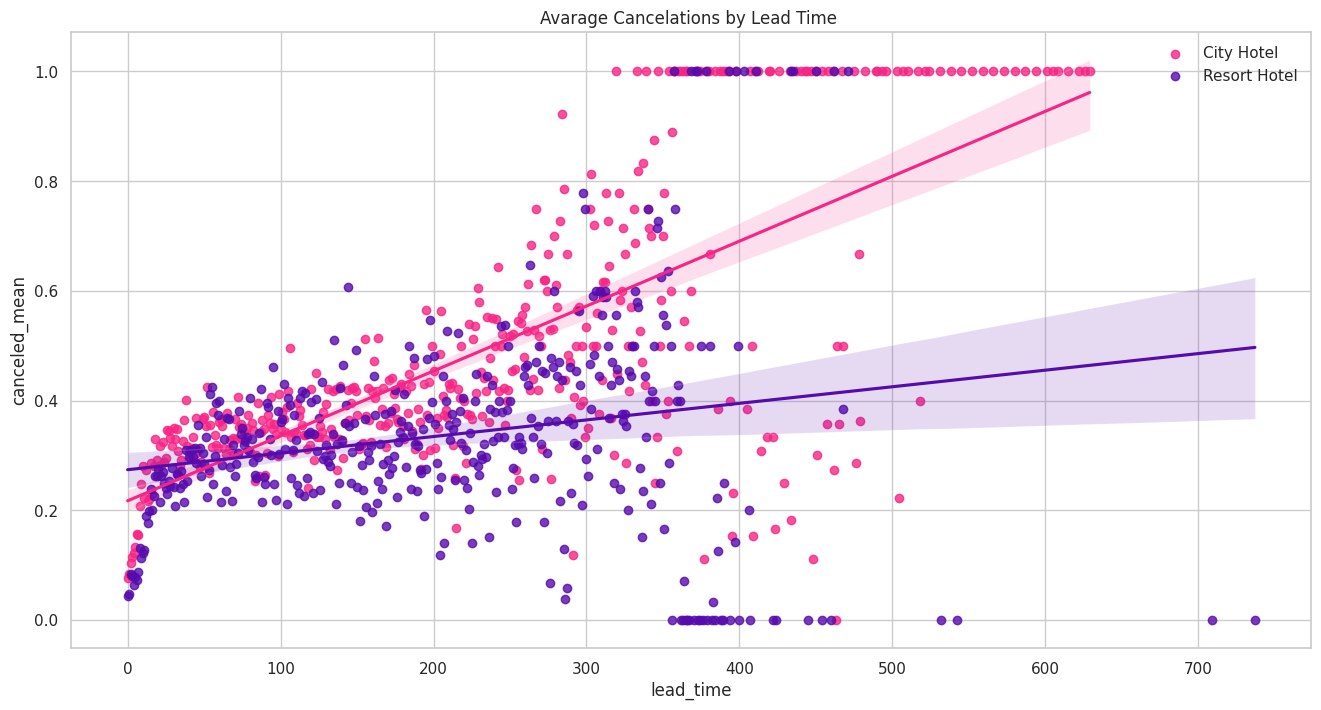

In [69]:
plt.title("Avarage Cancelations by Lead Time ")
sns.regplot(data=lead_cancel.loc[lead_cancel.hotel=='City Hotel'], x='lead_time', y='canceled_mean', label='City Hotel')
sns.regplot(data=lead_cancel.loc[lead_cancel.hotel=='Resort Hotel'], x='lead_time', y='canceled_mean', label='Resort Hotel')
plt.legend(ncol=1, loc="upper right", frameon=False);

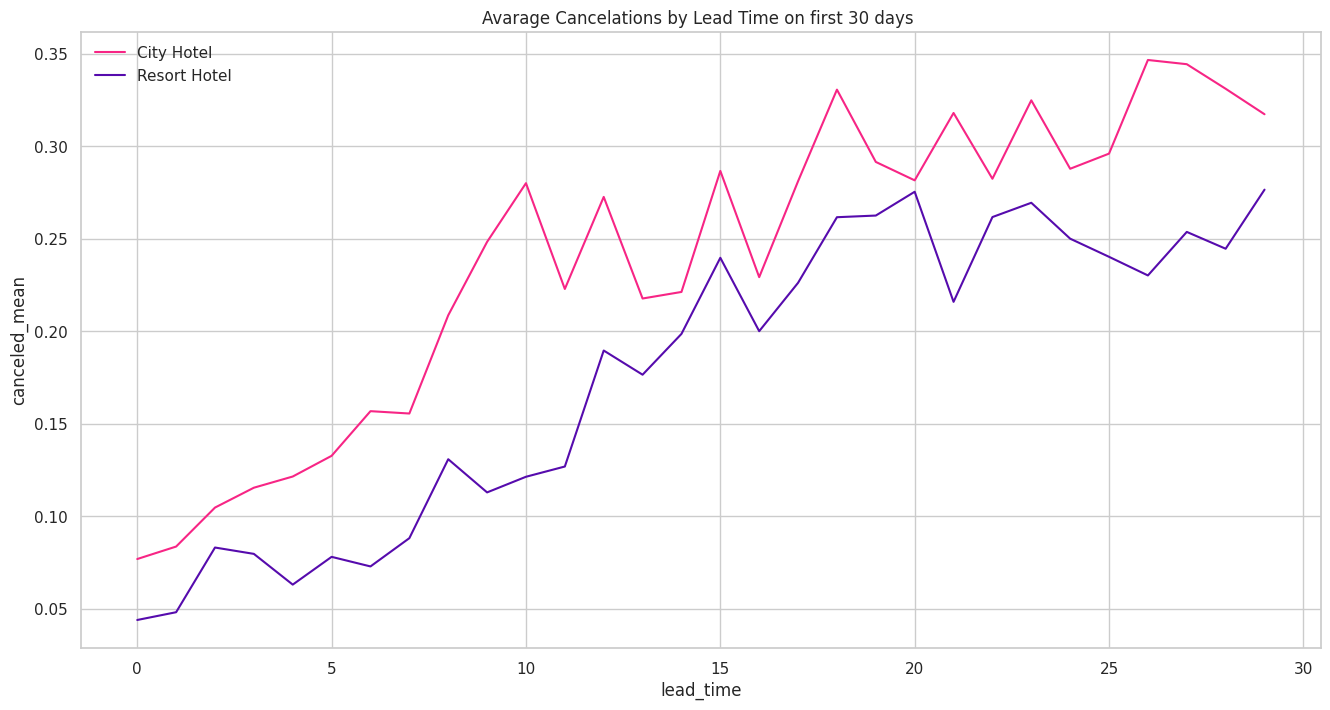

In [70]:
plt.title("Avarage Cancelations by Lead Time on first 30 days ")
sns.lineplot(data=lead_cancel.head(60), x="lead_time", y="canceled_mean", hue="hotel");
plt.legend(ncol=1, loc="best", frameon=False);

In [71]:
mean_lead_rh=rh.lead_time.loc[(rh.is_canceled == 0)].mean()
meanc_lead_rh=rh.lead_time.loc[(rh.is_canceled == 1)].mean()
mean_lead_ch=ch.lead_time.loc[(ch.is_canceled == 0)].mean()
meanc_lead_ch=ch.lead_time.loc[(ch.is_canceled == 1)].mean()

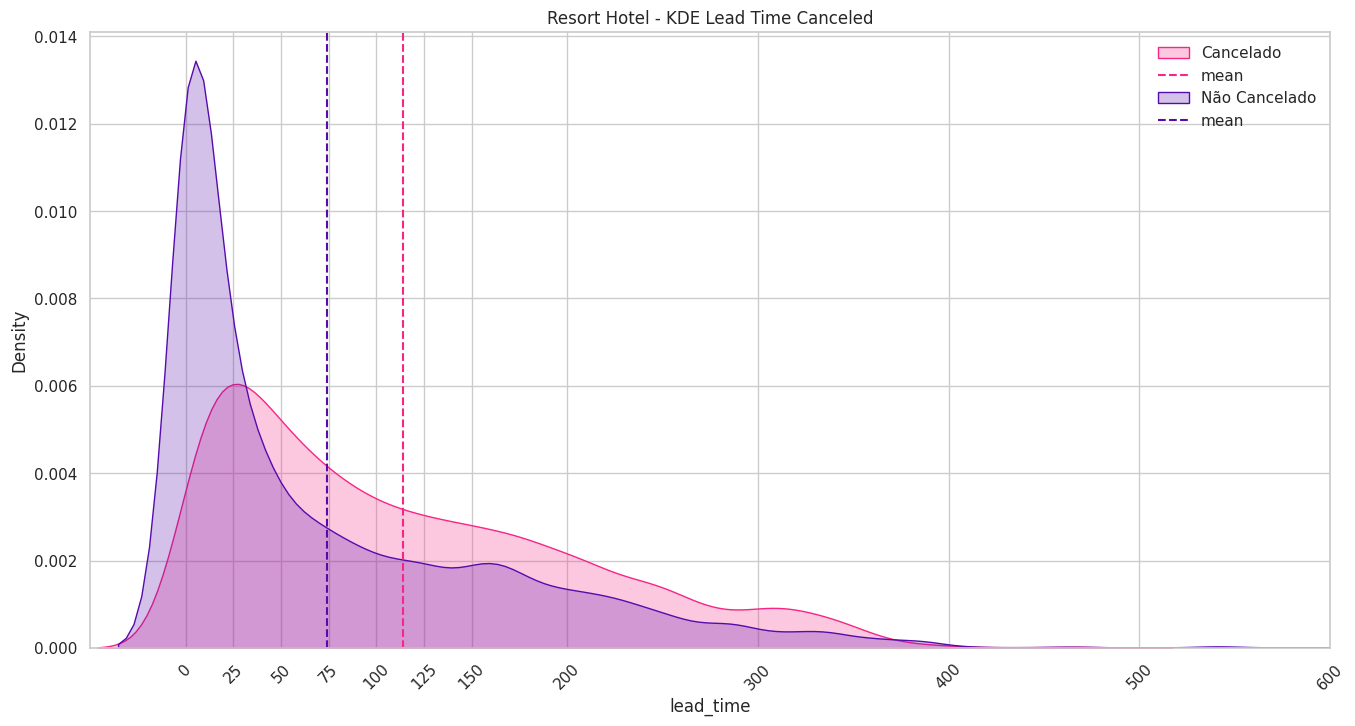

In [72]:
plt.title('Resort Hotel - KDE Lead Time Canceled')
sns.kdeplot(data=rh.loc[(rh.is_canceled == 1)], x='lead_time', fill=True, label='Cancelado')
plt.axvline(x=meanc_lead_rh, color='#f72585', linestyle='--', label='mean')
sns.kdeplot(data=rh.loc[(rh.is_canceled == 0)], x='lead_time', fill=True, label='Não Cancelado')#,
plt.axvline(x=mean_lead_rh, color='#560bad', linestyle='--', label='mean')
plt.xticks([0,25,50,75,100, 125,150,200,300,400,500,600], rotation=45)
plt.xlim(-50,600)
plt.legend(ncol=1, loc="upper right", frameon=False);

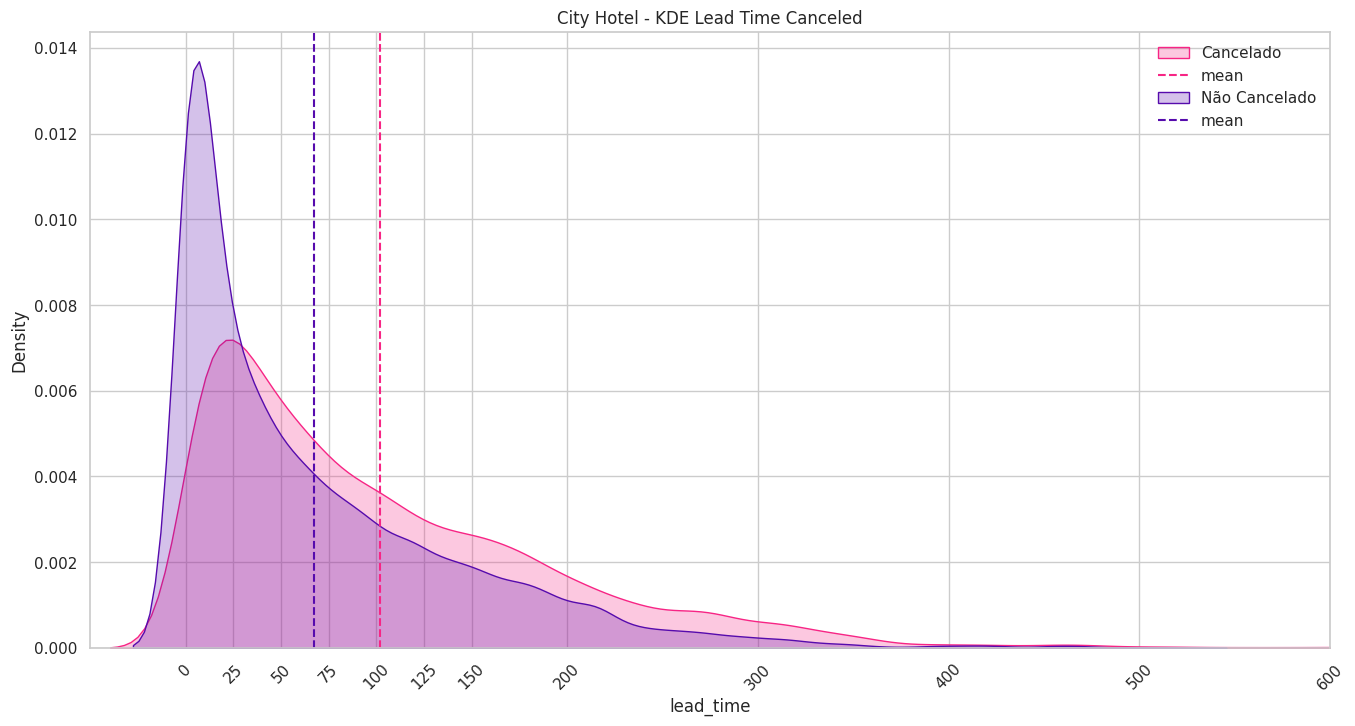

In [73]:
plt.title('City Hotel - KDE Lead Time Canceled')
sns.kdeplot(data=ch.loc[(ch.is_canceled == 1)], x='lead_time', fill=True, label='Cancelado')
plt.axvline(x=meanc_lead_ch, color='#f72585', linestyle='--', label='mean')
sns.kdeplot(data=ch.loc[(ch.is_canceled == 0)], x='lead_time', fill=True, label='Não Cancelado')
plt.axvline(x=mean_lead_ch, color='#560bad', linestyle='--', label='mean')
plt.xticks([0,25,50,75,100, 125,150,200,300,400,500,600], rotation=45)
plt.xlim(-50,600)
plt.legend(ncol=1, loc="upper right", frameon=False);

In [74]:
print('Avarage Cancelations below 10 days of Lead Time on Resort Hotel:', rh.is_canceled.loc[(rh.lead_time <= 10)].mean())
print('Avarage Cancelations above 10 days of Lead Time on Resort Hotel:', rh.is_canceled.loc[(rh.lead_time > 10)].mean())

Avarage Cancelations below 10 days of Lead Time on Resort Hotel: 0.0667090889808039
Avarage Cancelations above 10 days of Lead Time on Resort Hotel: 0.29953522504892366


In [75]:
print('Avarage Cancelations below 10 days of Lead Time on City Hotel:', ch.is_canceled.loc[(ch.lead_time <= 10)].mean())
print('Avarage Cancelations above 10 days of Lead Time on City Hotel:', ch.is_canceled.loc[(ch.lead_time > 10)].mean())

Avarage Cancelations below 10 days of Lead Time on City Hotel: 0.1267508213729898
Avarage Cancelations above 10 days of Lead Time on City Hotel: 0.34952782704568336


**H3:** True, the average cancellation rate for a lead time of less than or equal to 10 days is 7.57% in the resort hotel and 14.22% in the urban hotel, less than 34.56% and 47.06%, which are the respective rates average cancellation rates for lead times greater than 10 days.

### <div style="color:white;display:fill;border-radius:5px;background-color:#4361ee;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Country</p></div>

In [78]:
print('Number of unique Country: ', data.country.nunique()-1)
print('Number of unique Country on Resort Hotel: ', rh.country.nunique()-1)
print('Number of unique Country on City Hotel:', ch.country.nunique()-1)

Number of unique Country:  177
Number of unique Country on Resort Hotel:  125
Number of unique Country on City Hotel: 166


In [79]:
country_cancel=data.groupby(['country','hotel']).agg( reservations = ('country', 'size'),
                                         canceled_mean = ('is_canceled', 'mean')).sort_values(by='reservations', ascending=False).reset_index()
#country_cancel.head(10)#.style.background_gradient(cmap='Blues')

In [80]:
#Top 10 Paises que mais cancelam reservas no Resort Hotel( min 50 reservas)
country_cancel.loc[(country_cancel['hotel']=='Resort Hotel') & (country_cancel['reservations']>50)].sort_values(by='canceled_mean', ascending=False).head(10)

,country,hotel,reservations,canceled_mean
61,MAR,Resort Hotel,71,0.4507
60,LUX,Resort Hotel,74,0.3514
0,PRT,Resort Hotel,14231,0.3447
44,RUS,Resort Hotel,173,0.3237
28,CHE,Resort Hotel,415,0.2530
29,BRA,Resort Hotel,406,0.2241
7,ESP,Resort Hotel,3467,0.2146
51,NOR,Resort Hotel,114,0.2018
57,AUS,Resort Hotel,86,0.1744
9,IRL,Resort Hotel,1948,0.1740


In [81]:
#Top 10 Paises que menos cancelam reservas no Resort Hotel( min 50 reservas)
country_cancel.loc[(country_cancel['hotel']=='Resort Hotel') & (country_cancel['reservations']>50)].sort_values(by='canceled_mean', ascending=True).head(10)

,country,hotel,reservations,canceled_mean
26,Unknow,Resort Hotel,446,0.0673
65,DNK,Resort Hotel,62,0.0806
56,CHN,Resort Hotel,101,0.0891
23,NLD,Resort Hotel,480,0.1062
50,FIN,Resort Hotel,143,0.1119
31,BEL,Resort Hotel,391,0.1125
3,GBR,Resort Hotel,5903,0.1162
45,AUT,Resort Hotel,165,0.1273
20,CN,Resort Hotel,602,0.1279
36,POL,Resort Hotel,299,0.1304


In [82]:
#Top 10 Paises que mais cancelam reservas no City Hotel( min 50 reservas)
country_cancel.loc[(country_cancel['hotel']=='City Hotel') & (country_cancel['reservations']>50)].sort_values(by='canceled_mean', ascending=False).head(10)

,country,hotel,reservations,canceled_mean
35,AGO,City Hotel,319,0.5862
19,CHN,City Hotel,715,0.5357
41,TUR,City Hotel,193,0.4663
47,MAR,City Hotel,161,0.4472
32,RUS,City Hotel,386,0.4301
42,LUX,City Hotel,187,0.4118
11,BRA,City Hotel,1587,0.4008
66,ZAF,City Hotel,60,0.4000
8,ITA,City Hotel,2642,0.3796
1,PRT,City Hotel,13133,0.3720


In [83]:
#Top 10 Paises que menos cancelam reservas no City Hotel( min 50 reservas)
country_cancel.loc[(country_cancel['hotel']=='City Hotel') & (country_cancel['reservations']>50)].sort_values(by='canceled_mean', ascending=True).head(10)

,country,hotel,reservations,canceled_mean
63,MEX,City Hotel,68,0.1324
64,BGR,City Hotel,63,0.1429
43,JPN,City Hotel,174,0.1437
39,FIN,City Hotel,278,0.1727
18,AUT,City Hotel,782,0.1905
5,DEU,City Hotel,4465,0.2085
2,FRA,City Hotel,7400,0.2089
12,NLD,City Hotel,1430,0.2091
10,BEL,City Hotel,1690,0.2172
62,DZA,City Hotel,70,0.2286


### <div style="color:white;display:fill;border-radius:5px;background-color:#4361ee;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Previous Cancelation</p></div>

In [85]:
previous_cancel=data.groupby(['previous_cancellations','hotel']).agg( reservations = ('previous_cancellations', 'size'),
                                                                      canceled_mean = ('is_canceled', 'mean')).reset_index()

previous_cancel.head(12)

,previous_cancellations,hotel,reservations,canceled_mean
0,0,City Hotel,52113,0.2925
1,0,Resort Hotel,33450,0.2284
2,1,City Hotel,965,0.8041
3,1,Resort Hotel,441,0.6689
4,2,City Hotel,70,0.1857
5,2,Resort Hotel,40,0.5250
6,3,City Hotel,51,0.1373
7,3,Resort Hotel,10,0.9000
8,4,City Hotel,24,0.1250
9,4,Resort Hotel,6,0.5000


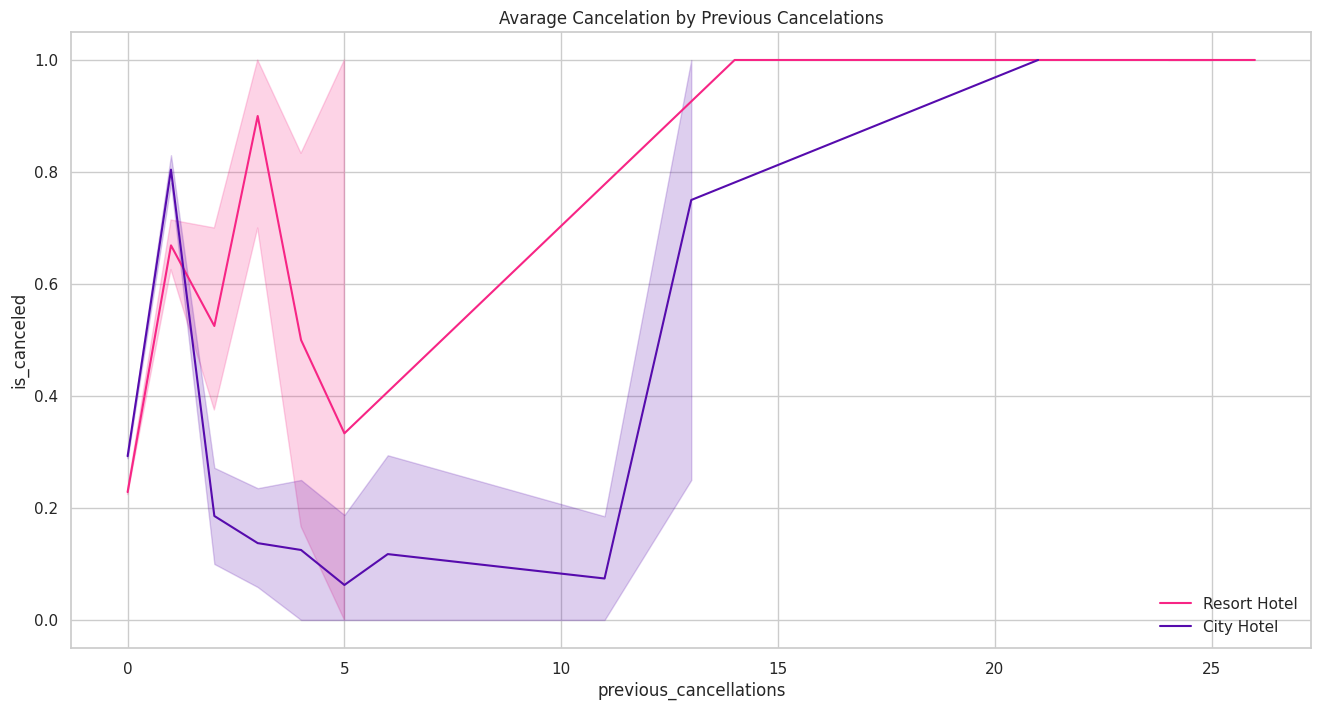

In [86]:
sns.lineplot(data=data, x="previous_cancellations", y='is_canceled', hue="hotel")
plt.title("Avarage Cancelation by Previous Cancelations")
plt.legend(ncol=1, loc="lower right", frameon=False);

In [87]:
print('Taxa de Cancelamento médio City Hotel de quem não possui registro de cancelamento anterior',ch.is_canceled.loc[(ch.previous_cancellations == 0)].mean())
print('Taxa de Cancelamento médio City Hotel de quem possui ao menos um registro de cancelamento anterior',ch.is_canceled.loc[(ch.previous_cancellations > 0)].mean())

print('Taxa de Cancelamento médio Resort Hotel de quem não possui registro de cancelamento anterior',rh.is_canceled.loc[(rh.previous_cancellations == 0)].mean())
print('Taxa de Cancelamento médio Resort Hotel de quem possui ao menos um registro de cancelamento anterior',rh.is_canceled.loc[(rh.previous_cancellations > 0)].mean())

Taxa de Cancelamento médio City Hotel de quem não possui registro de cancelamento anterior 0.2924606144340184
Taxa de Cancelamento médio City Hotel de quem possui ao menos um registro de cancelamento anterior 0.6876595744680851
Taxa de Cancelamento médio Resort Hotel de quem não possui registro de cancelamento anterior 0.22840059790732437
Taxa de Cancelamento médio Resort Hotel de quem possui ao menos um registro de cancelamento anterior 0.6627218934911243


**H5:** True, the average cancellation rate for those who do not have a previous cancellation record at City and Resort Hotel is 38.05% and 26.18%. Those who have at least one cancellation record are 93.16% and 84.38% respectively.

### <div style="color:white;display:fill;border-radius:5px;background-color:#4361ee;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Special Request</p></div>

In [90]:
especial_cancel=data.groupby(['total_of_special_requests','hotel']).agg( reservations = ('total_of_special_requests', 'size'),
                                                                         canceled_mean = ('is_canceled', 'mean')).reset_index()

especial_cancel

,total_of_special_requests,hotel,reservations,canceled_mean
0,0,City Hotel,26277,0.3841
1,0,Resort Hotel,17524,0.2558
2,1,City Hotel,18016,0.2306
3,1,Resort Hotel,10962,0.2143
4,2,City Hotel,7320,0.2092
5,2,Resort Hotel,4475,0.2199
6,3,City Hotel,1470,0.1707
7,3,Resort Hotel,845,0.1728
8,4,City Hotel,183,0.1093
9,4,Resort Hotel,137,0.1022


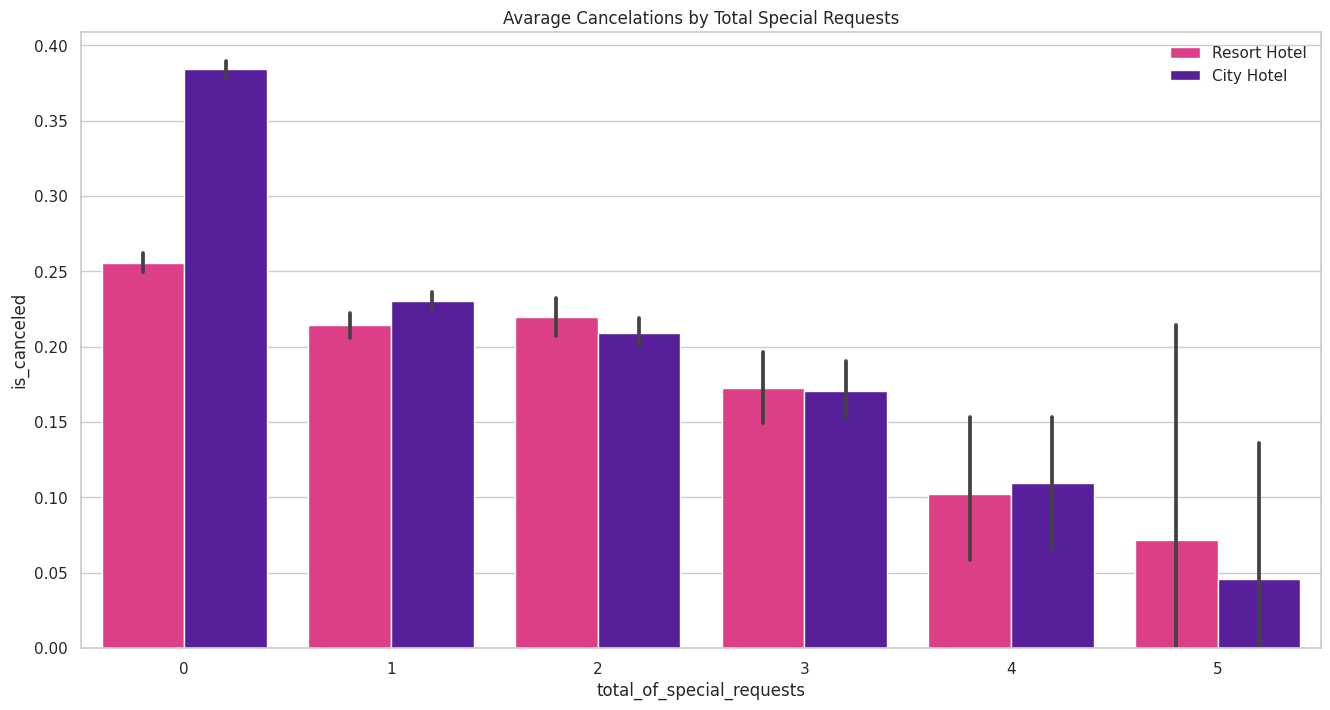

In [91]:
sns.barplot(data=data, x="total_of_special_requests", y="is_canceled", hue="hotel")
plt.title("Avarage Cancelations by Total Special Requests")
plt.legend(ncol=1, loc="upper right", frameon=False)
plt.show()

In [92]:
print('Taxa de Cancelamento médio City Hotel sem requisições especiais',ch.is_canceled.loc[(ch.total_of_special_requests == 0)].mean())
print('Taxa de Cancelamento médio City Hotel com pelo menos uma requisição especial',ch.is_canceled.loc[(ch.total_of_special_requests > 0)].mean())

print('Taxa de Cancelamento médio Resort Hotel sem requisições especiais',rh.is_canceled.loc[(rh.total_of_special_requests == 0)].mean())
print('Taxa de Cancelamento médio Resort Hotel com pelo menos uma requisição especial',rh.is_canceled.loc[(rh.total_of_special_requests > 0)].mean())

Taxa de Cancelamento médio City Hotel sem requisições especiais 0.3840621075465236
Taxa de Cancelamento médio City Hotel com pelo menos uma requisição especial 0.22053978008959313
Taxa de Cancelamento médio Resort Hotel sem requisições especiais 0.2557635243095184
Taxa de Cancelamento médio Resort Hotel com pelo menos uma requisição especial 0.21262094565812695


**H4** True, the average cancellation rate for those who do not make any special requests at City and Resort Hotel is 55.02% and 32.29% and those who make at least one special request are 21.59% and 22.07% respectively.

### <div style="color:white;display:fill;border-radius:5px;background-color:#4361ee;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by parking Required</p></div>

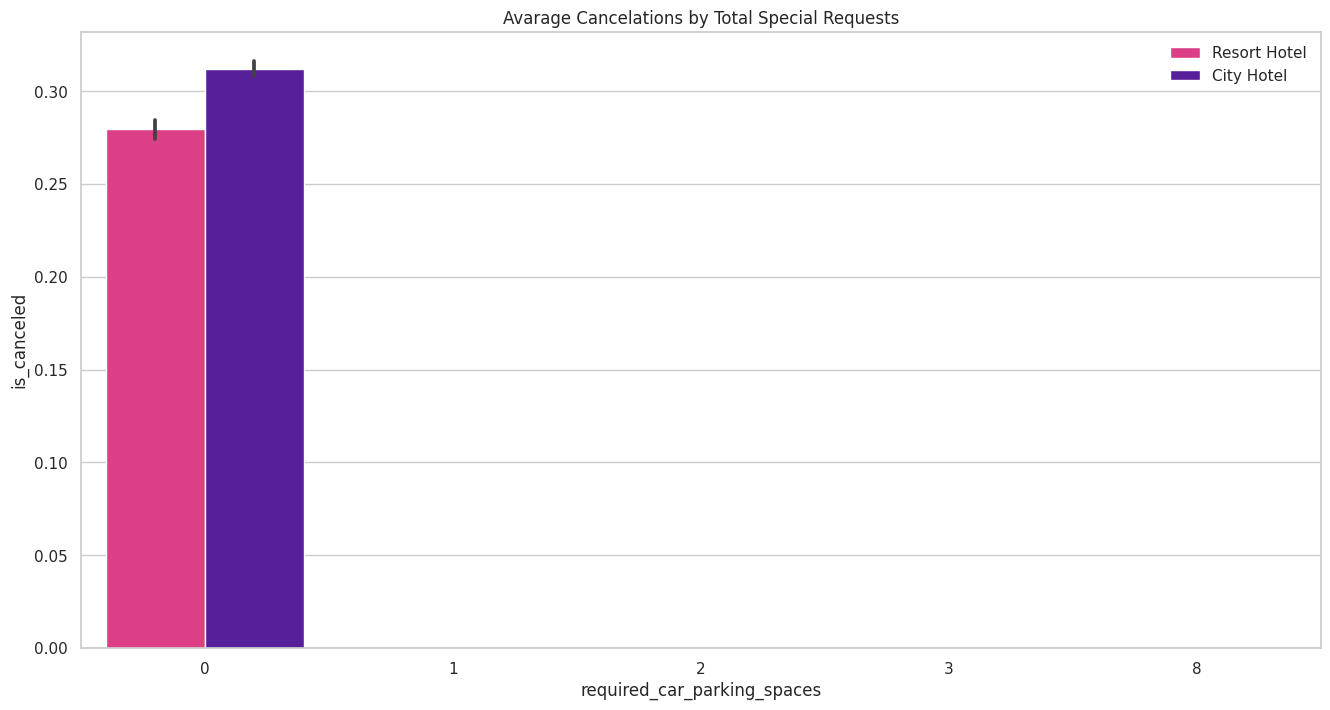

In [94]:
sns.barplot(data=data, x="required_car_parking_spaces", y="is_canceled", hue="hotel")
plt.title("Avarage Cancelations by Total Special Requests")
plt.legend(ncol=1, loc="upper right", frameon=False);

In [95]:
print('Taxa de Cancelamento médio City Hotel sem requisição de estacionamento',ch.is_canceled.loc[(ch.required_car_parking_spaces == 0)].mean())
print('Taxa de Cancelamento médio City Hotel com pelo menos uma requisição de vaga de estacionamento',ch.is_canceled.loc[(ch.required_car_parking_spaces > 0)].mean())

print('Taxa de Cancelamento médio Resort Hotel sem requisição de estacionamento',rh.is_canceled.loc[(rh.required_car_parking_spaces == 0)].mean())
print('Taxa de Cancelamento médio Resort Hotel com pelo menos uma requisição de vaga de estacionamento',rh.is_canceled.loc[(rh.required_car_parking_spaces > 0)].mean())

Taxa de Cancelamento médio City Hotel sem requisição de estacionamento 0.312249503871746
Taxa de Cancelamento médio City Hotel com pelo menos uma requisição de vaga de estacionamento 0.0
Taxa de Cancelamento médio Resort Hotel sem requisição de estacionamento 0.27945762236782173
Taxa de Cancelamento médio Resort Hotel com pelo menos uma requisição de vaga de estacionamento 0.0


### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelamentos por Quarto</p></div>

In [96]:
previous_cancel=data.groupby(['reserved_room_type','hotel']).agg( reservations = ('reserved_room_type', 'size'),
                                                                      canceled_mean = ('is_canceled', 'mean')).reset_index()
previous_cancel

,reserved_room_type,hotel,reservations,canceled_mean
0,A,City Hotel,37840,0.2853
1,A,Resort Hotel,18600,0.2092
2,B,City Hotel,994,0.3199
3,B,Resort Hotel,3,0.0000
4,C,City Hotel,13,0.3846
5,C,Resort Hotel,901,0.3230
6,D,City Hotel,10746,0.3423
7,D,Resort Hotel,6631,0.2350
8,E,City Hotel,1460,0.3123
9,E,Resort Hotel,4579,0.2605


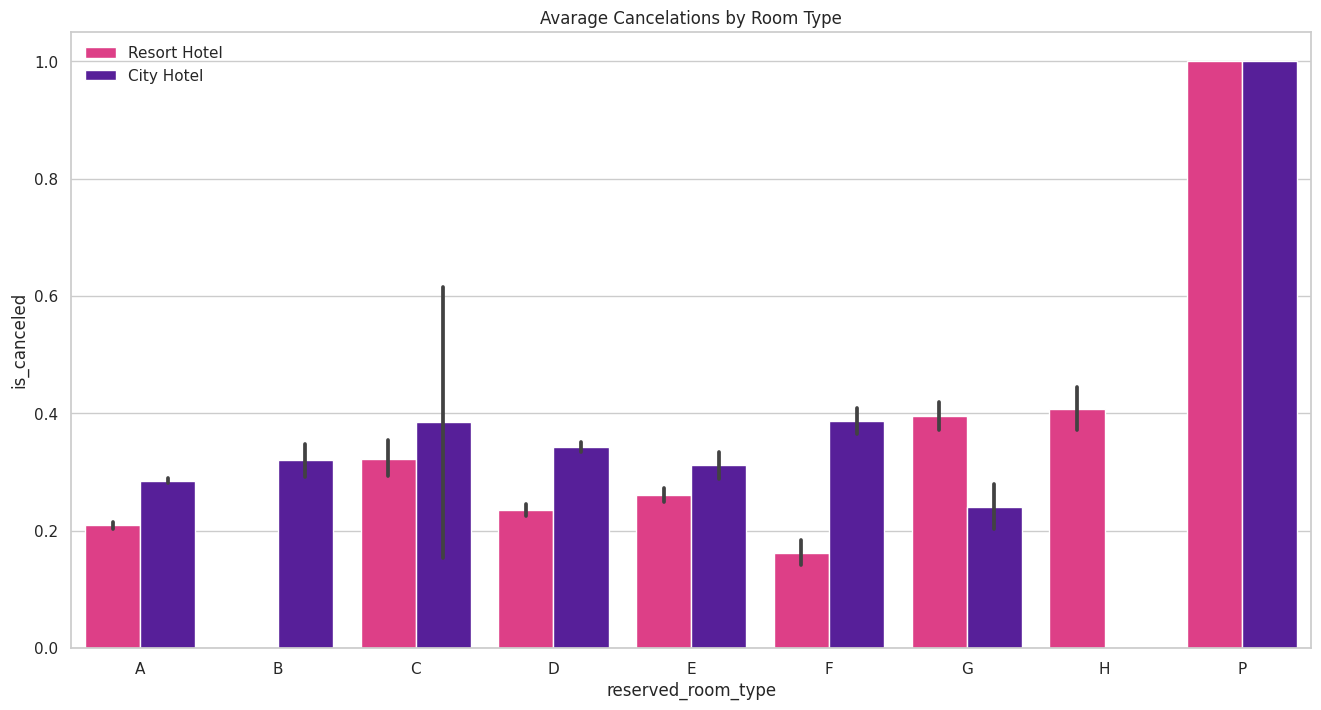

In [97]:
sns.barplot(data=data, x="reserved_room_type", y="is_canceled", hue="hotel", order=['A','B','C','D','E','F','G','H','P'])
plt.title("Avarage Cancelations by Room Type")
plt.legend(ncol=1, loc="upper left", frameon=False);

### <div style="color:white;display:fill;border-radius:5px;background-color:#4361ee;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Agency</p></div>

In [99]:
print('Number of unique agencies: ',data.agent.nunique()-1)

Number of unique agencies:  333


In [100]:
agent_cancel=data.groupby(['agent','hotel']).agg( reservations = ('agent', 'size'),
                                                  adr_mean = ('adr', 'mean'),
                                                  canceled_mean = ('is_canceled', 'mean')).sort_values(by='reservations',ascending=False).reset_index()

agent_cancel.head(10)

,agent,hotel,reservations,adr_mean,canceled_mean
0,9,City Hotel,28717,123.6804,0.4012
1,240,Resort Hotel,13020,117.5016,0.3796
2,0,Resort Hotel,6600,77.5143,0.1100
3,0,City Hotel,5550,90.1262,0.1497
4,14,City Hotel,3342,127.4675,0.1744
5,7,City Hotel,3294,96.8048,0.1324
6,250,Resort Hotel,2778,133.7465,0.1778
7,241,Resort Hotel,1644,101.8554,0.1326
8,28,City Hotel,1493,80.1948,0.0583
9,1,City Hotel,1223,75.2577,0.3729


In [101]:
n = 11
top_rh_agents = rh['agent'].value_counts().nlargest(n).index
top_ch_agents = ch['agent'].value_counts().nlargest(n).index

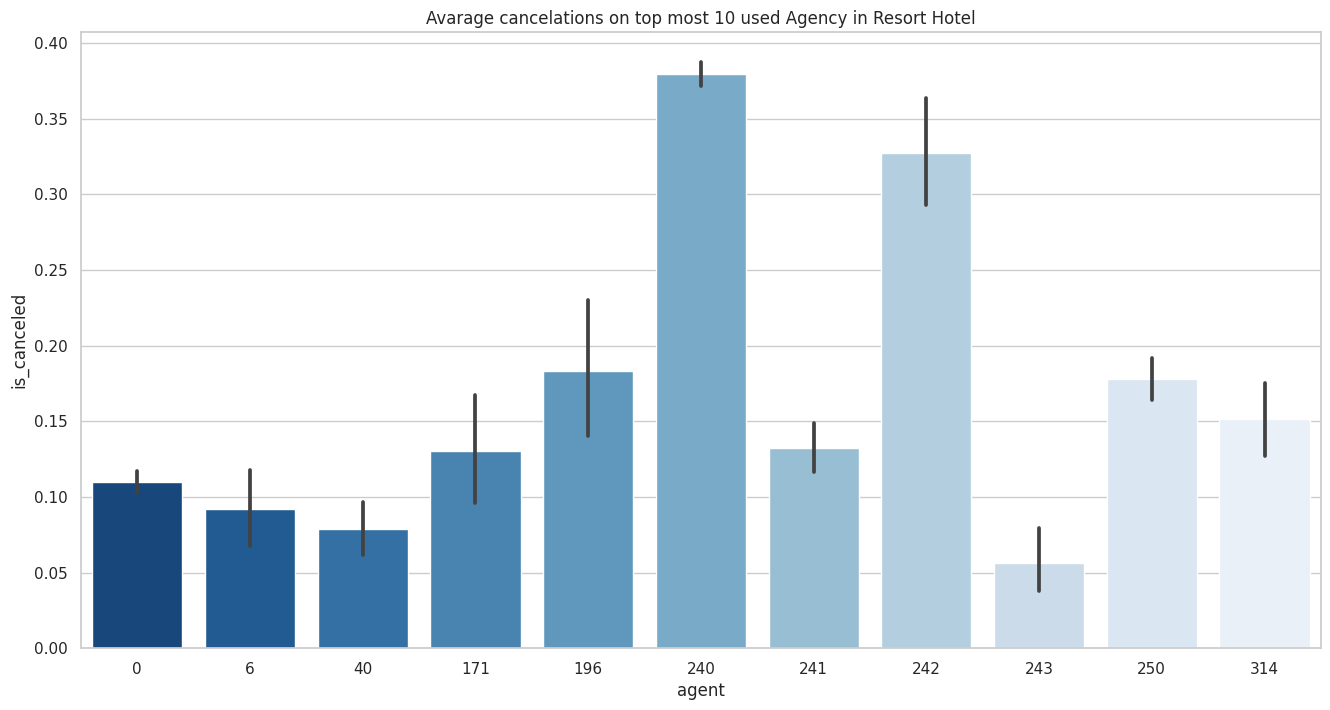

In [109]:
plt.title("Avarage cancelations on top most 10 used Agency in Resort Hotel")
sns.barplot(data=rh.loc[rh['agent'].isin(top_rh_agents)], x="agent", y="is_canceled", palette='Blues_r');

In [110]:
print('Minimo:',agent_cancel.canceled_mean.loc[(agent_cancel['hotel']=='Resort Hotel') & (agent_cancel['agent']!=0)].head(10).min())
print('Maximo:',agent_cancel.canceled_mean.loc[(agent_cancel['hotel']=='Resort Hotel') & (agent_cancel['agent']!=0)].head(10).max())

Minimo: 0.05660377358490566
Maximo: 0.3796466973886329


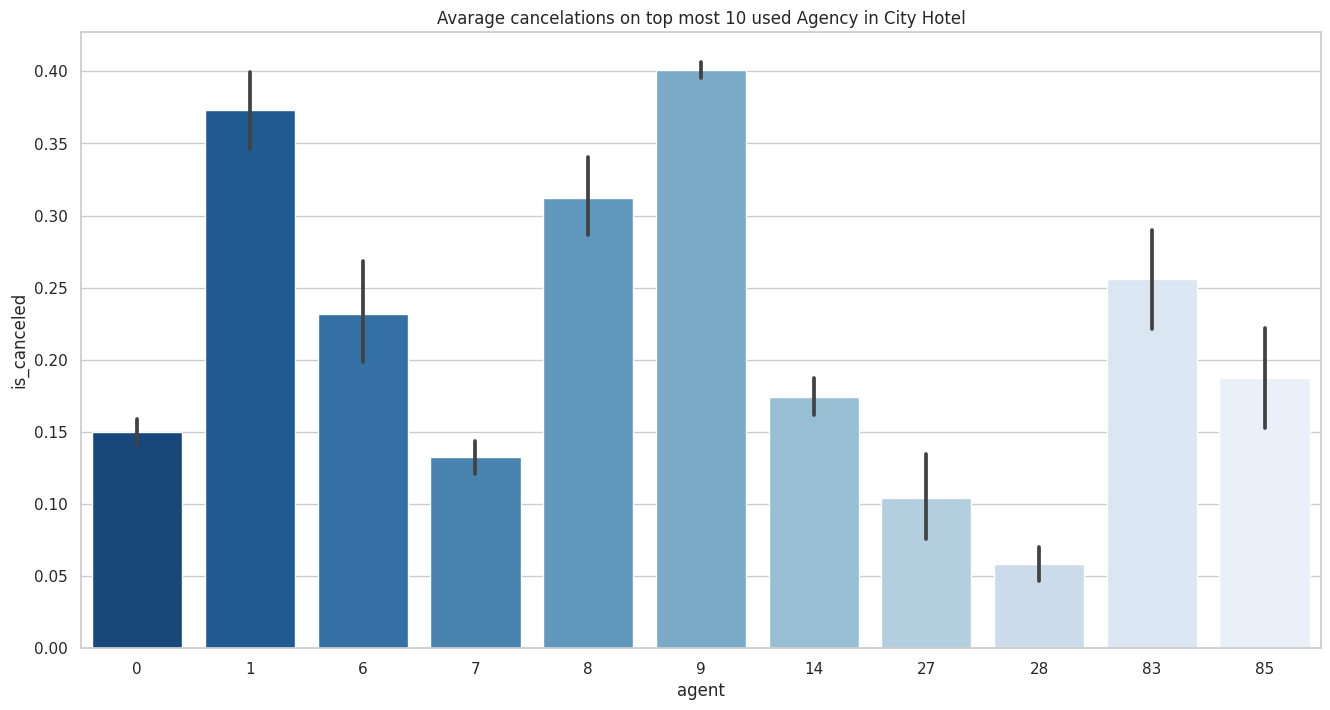

In [111]:
plt.title("Avarage cancelations on top most 10 used Agency in City Hotel")
sns.barplot(data=ch.loc[ch['agent'].isin(top_ch_agents)], x="agent", y="is_canceled", palette='Blues_r');

In [112]:
print('Minimo:', agent_cancel.canceled_mean.loc[(agent_cancel['hotel']=='City Hotel') & (agent_cancel['agent']!=0)].head(10).min())
print('Maximo:', agent_cancel.canceled_mean.loc[(agent_cancel['hotel']=='City Hotel') & (agent_cancel['agent']!=0)].head(10).max())

Minimo: 0.05827193569993302
Maximo: 0.401225754779399


In [113]:
x = data.loc[(data['agent']!=0)]
x.market_segment.value_counts()

Online TA        51233
Offline TA/TO    13700
Direct            6192
Groups            3325
Corporate          524
Complementary       97
Aviation            24
Name: market_segment, dtype: int64

**OBS:** Agency 0 means: no agency or undefined agency

**H6:** False, the difference in the average cancellation of the top ten agencies is higher than 10%.

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Company</p></div>

In [114]:
print('Number of unique companies: ',data.company.nunique()-1)

Number of unique companies:  350


In [115]:
company_cancel=data.groupby(['company','hotel']).agg( reservations = ('company', 'size'),
                                                      adr_mean = ('adr', 'mean'),
                                                      adr_sum = ('adr', 'sum'),
                                                      canceled_mean = ('is_canceled', 'mean')).sort_values(by='reservations',ascending=False).reset_index()


company_cancel.head(10)

,company,hotel,reservations,adr_mean,adr_sum,canceled_mean
0,0,City Hotel,50520,113.1092,"5,714,275.5400",0.3109
1,0,Resort Hotel,31483,102.5968,"3,230,053.6500",0.2459
2,40,City Hotel,845,65.9391,"55,718.5000",0.0793
3,223,Resort Hotel,503,56.9012,"28,621.3100",0.0457
4,45,City Hotel,237,0.5844,138.5000,0.1097
5,153,City Hotel,205,100.4667,"20,595.6800",0.2049
6,154,Resort Hotel,133,48.5124,"6,452.1500",0.0376
7,219,City Hotel,131,90.8866,"11,906.1500",0.0534
8,281,Resort Hotel,119,42.8676,"5,101.2400",0.1345
9,174,City Hotel,97,97.4044,"9,448.2300",0.1031


In [136]:
n = 6
top_rh_company = rh['company'].value_counts().nlargest(n).index
top_ch_company = ch['company'].value_counts().nlargest(n).index

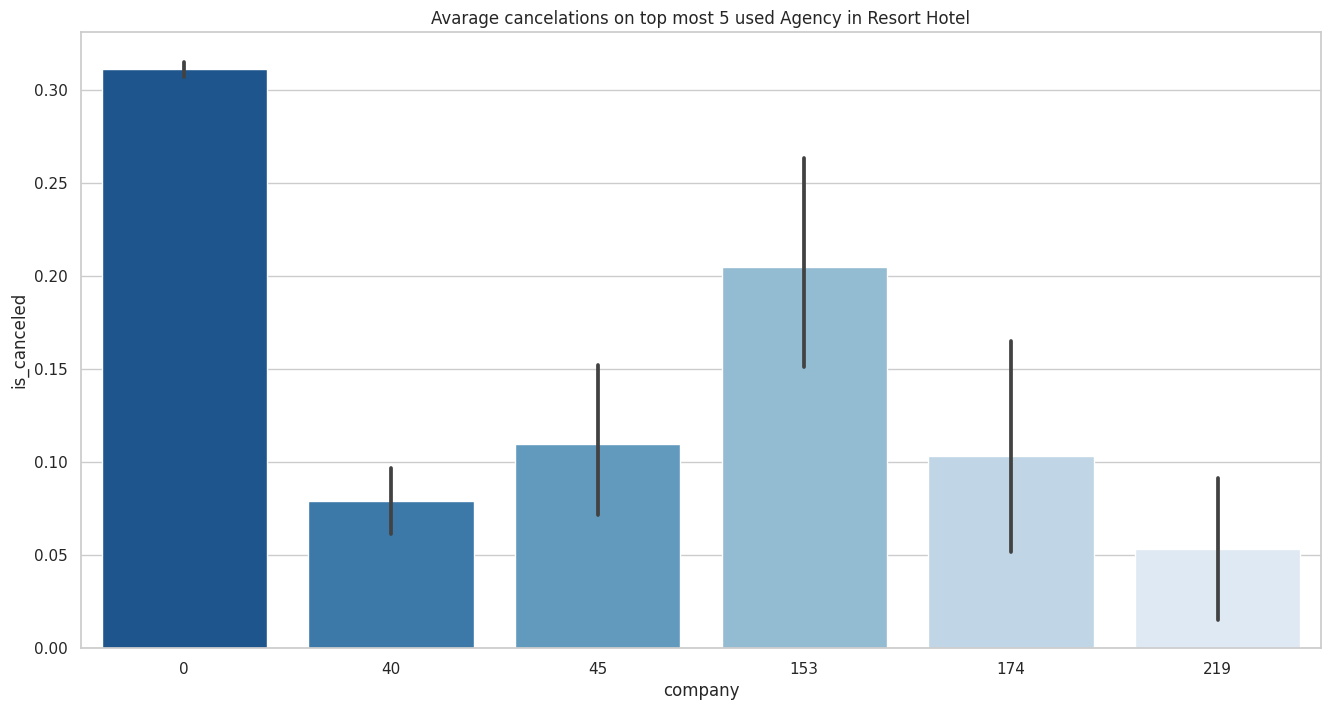

In [137]:
plt.figure(figsize=(16, 8))
plt.title("Avarage cancelations on top most 5 used Agency in Resort Hotel")
sns.barplot(data=ch.loc[ch['company'].isin(top_ch_company)], x="company", y="is_canceled", palette='Blues_r');

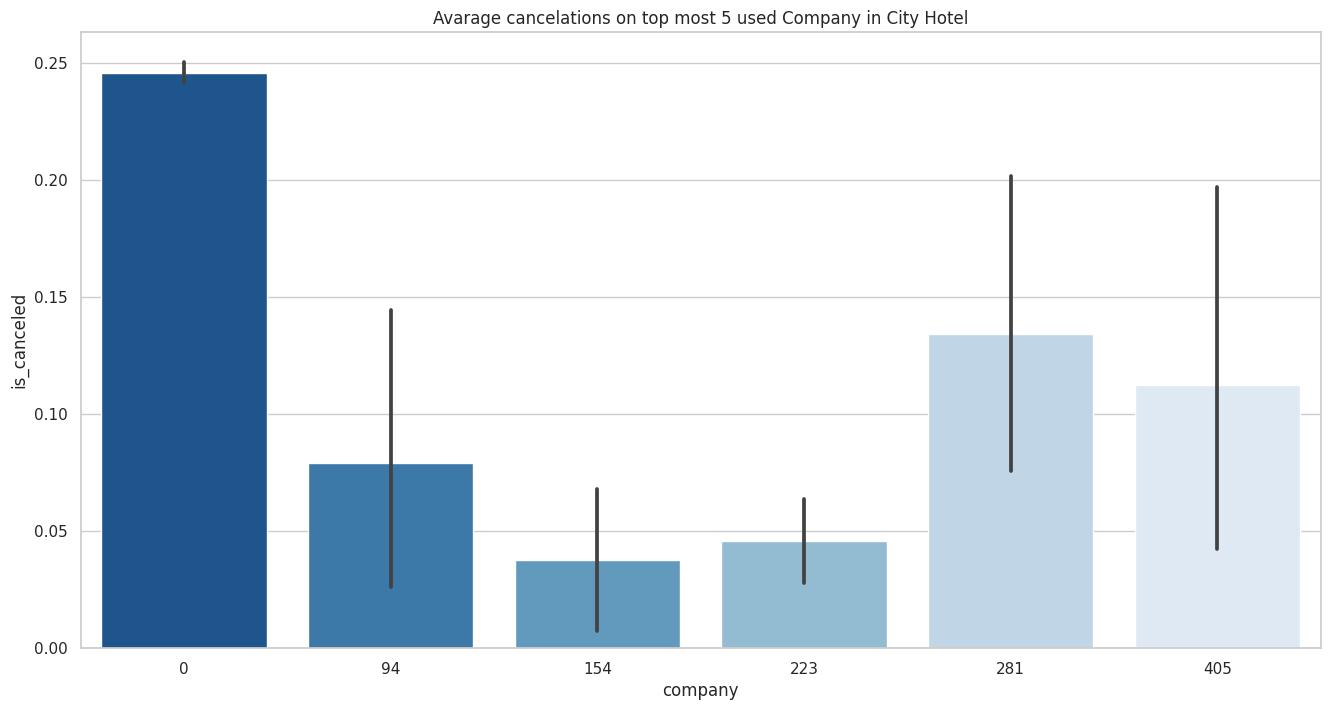

In [138]:
plt.title("Avarage cancelations on top most 5 used Company in City Hotel")
sns.barplot(data=rh.loc[rh['company'].isin(top_rh_company)], x="company", y="is_canceled", palette='Blues_r');

In [139]:
x = data.loc[(data['company']!=0)]
x.market_segment.value_counts()

Corporate        3583
Groups            824
Complementary     289
Aviation          202
Direct            192
Online TA          77
Offline TA/TO      75
Name: market_segment, dtype: int64

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by repeated guest</p></div>

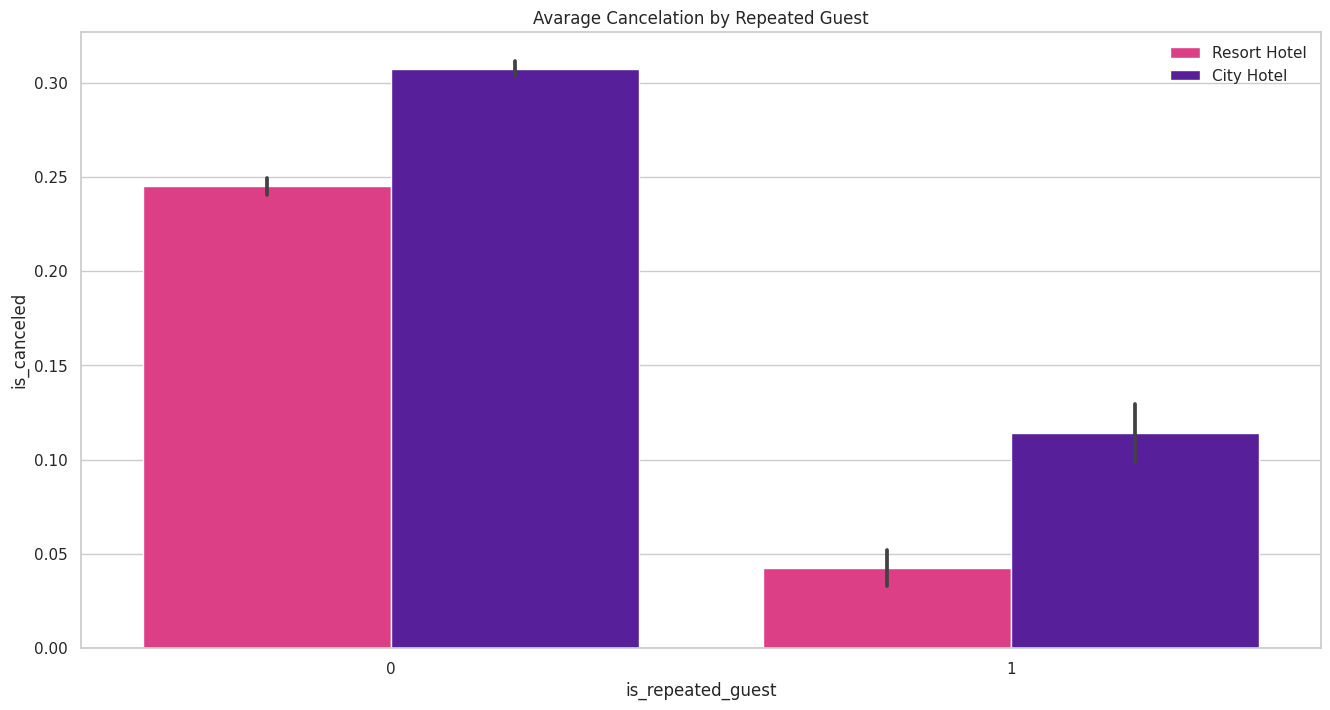

In [140]:
sns.barplot(data=data, x="is_repeated_guest", y='is_canceled', hue="hotel")
plt.title("Avarage Cancelation by Repeated Guest")
plt.legend(ncol=1, loc="best", frameon=False);

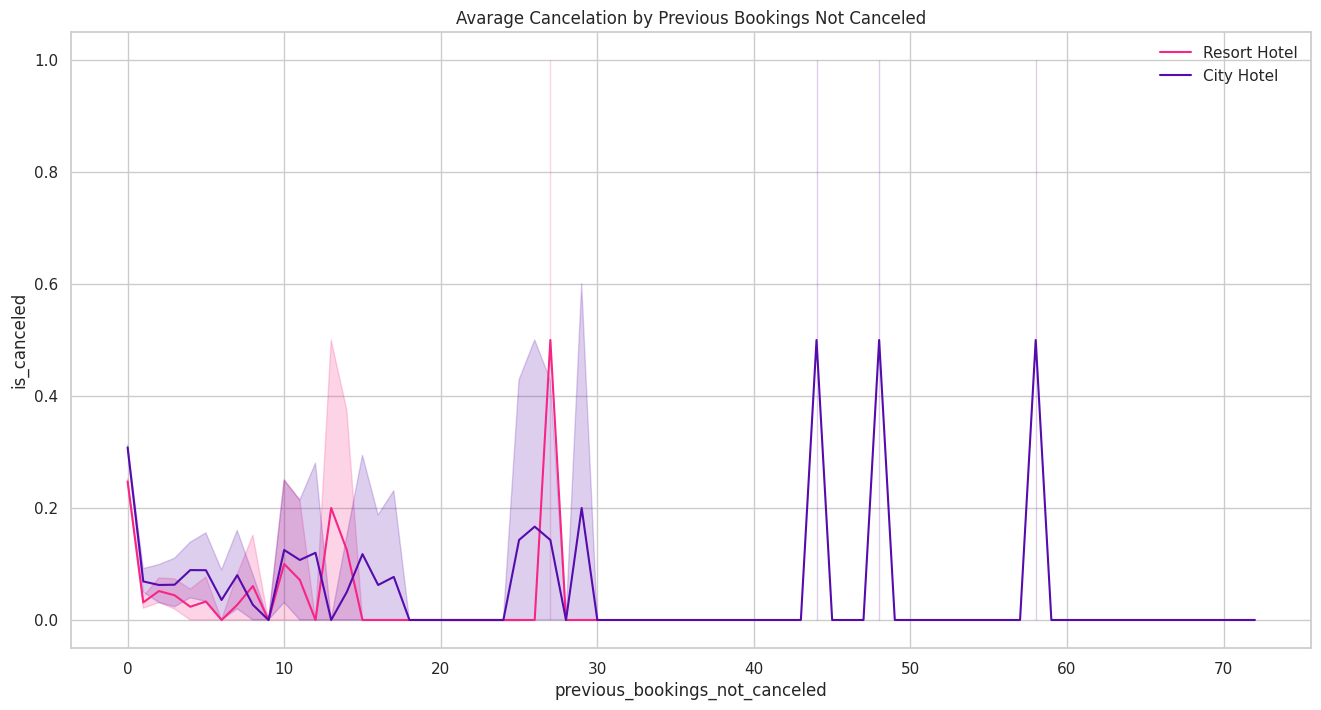

In [141]:
sns.lineplot(data=data, x="previous_bookings_not_canceled", y='is_canceled', hue="hotel")
plt.title("Avarage Cancelation by Previous Bookings Not Canceled")
plt.legend(ncol=1, loc="best", frameon=False);

In [142]:
data.groupby(['previous_bookings_not_canceled','hotel']).agg( reservations = ('previous_bookings_not_canceled', 'size'),
                                                      adr_mean = ('adr', 'mean'),
                                                      adr_sum = ('adr', 'sum'),
                                                      canceled_mean = ('is_canceled', 'mean')).sort_values(by='previous_bookings_not_canceled',ascending=True).reset_index().head(22)

,previous_bookings_not_canceled,hotel,reservations,adr_mean,adr_sum,canceled_mean
0,0,City Hotel,51764,112.4411,"5,820,401.0700",0.3081
1,0,Resort Hotel,31944,101.1660,"3,231,647.5200",0.2473
2,1,City Hotel,523,81.4089,"42,576.8700",0.0688
3,1,Resort Hotel,955,70.7185,"67,536.1400",0.0314
4,2,City Hotel,192,74.7896,"14,359.6100",0.0625
5,2,Resort Hotel,387,65.6505,"25,406.7500",0.0517
6,3,City Hotel,127,63.8602,"8,110.2400",0.0630
7,3,Resort Hotel,204,60.5054,"12,343.1100",0.0441
8,4,City Hotel,101,68.2124,"6,889.4500",0.0891
9,4,Resort Hotel,127,63.4717,"8,060.9000",0.0236


### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Market Segment</p></div>

In [143]:
market_cancel_ch = ch.groupby(['market_segment']).agg( reservations = ('arrival_date_month', 'size'),
                                   adr_mean = ('adr', 'mean'),
                                   days_stay_mean = ('days_stay', 'mean'),                             
                                   people_mean = ('people', 'mean'),
                                   canceled_mean = ('is_canceled', 'mean')).sort_values(by='reservations',ascending=False).reset_index()

market_cancel_ch.style.background_gradient(cmap='Blues')

,market_segment,reservations,adr_mean,days_stay_mean,people_mean,canceled_mean
0,Online TA,34932,119.960697,3.306166,2.139900,0.361216
1,Offline TA/TO,7243,87.583871,3.230706,1.869943,0.174099
2,Direct,5538,121.243682,2.871975,2.065728,0.164680
3,Groups,2622,85.164493,2.627765,1.610221,0.339436
4,Corporate,2219,82.982821,1.882379,1.205949,0.118973
5,Complementary,506,2.785435,1.492095,1.616601,0.112648
6,Aviation,226,100.613628,3.588496,1.013274,0.199115
7,Undefined,2,15.000000,1.500000,2.500000,1.000000


In [144]:
market_cancel_rh = rh.groupby(['market_segment']).agg( reservations = ('arrival_date_month', 'size'),
                                   adr_mean = ('adr', 'mean'),
                                   days_stay_mean = ('days_stay', 'mean'),                             
                                   people_mean = ('people', 'mean'),
                                   canceled_mean = ('is_canceled', 'mean')).sort_values(by='reservations',ascending=False).reset_index()

market_cancel_rh.style.background_gradient(cmap='Blues')

,market_segment,reservations,adr_mean,days_stay_mean,people_mean,canceled_mean
0,Online TA,16624,114.776912,4.232736,2.165544,0.338487
1,Offline TA/TO,6618,75.707463,6.320641,1.992294,0.121185
2,Direct,6242,112.827406,3.540372,2.130888,0.132169
3,Groups,2302,63.718936,4.384448,1.751520,0.193310
4,Corporate,1982,51.920873,2.181130,1.247730,0.124117
5,Complementary,189,3.868466,2.185185,1.698413,0.164021


### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Customer Type</p></div>

In [145]:
customer_cancel_ch = ch.groupby(['customer_type']).agg( reservations = ('customer_type', 'size'),
                                     adr_mean = ('adr', 'mean'),
                                     days_stay_mean = ('days_stay', 'mean'),                             
                                     people_mean = ('people', 'mean'),
                                     canceled_mean = ('is_canceled', 'mean')).sort_values(by='reservations',ascending=False).reset_index()

customer_cancel_ch.style.background_gradient(cmap='Oranges')

,customer_type,reservations,adr_mean,days_stay_mean,people_mean,canceled_mean
0,Transient,44532,114.266192,3.195118,2.072397,0.325025
1,Transient-Party,7020,93.432115,2.825356,1.701994,0.168519
2,Contract,1467,107.854431,3.158828,2.012270,0.250852
3,Group,269,93.995874,2.524164,1.847584,0.089219


In [146]:
customer_cancel_rh = rh.groupby(['customer_type']).agg( reservations = ('customer_type', 'size'),
                                     adr_mean = ('adr', 'mean'),
                                     days_stay_mean = ('days_stay', 'mean'),                             
                                     people_mean = ('people', 'mean'),
                                     canceled_mean = ('is_canceled', 'mean')).sort_values(by='reservations',ascending=False).reset_index()

customer_cancel_rh.style.background_gradient(cmap='Oranges')

,customer_type,reservations,adr_mean,days_stay_mean,people_mean,canceled_mean
0,Transient,27341,103.802995,4.199920,2.070553,0.263268
1,Transient-Party,4675,79.585609,4.085989,1.822674,0.129198
2,Contract,1668,79.693843,8.575540,2.000600,0.086331
3,Group,273,75.463773,3.249084,3.087912,0.109890


### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Deposit Type</p></div>

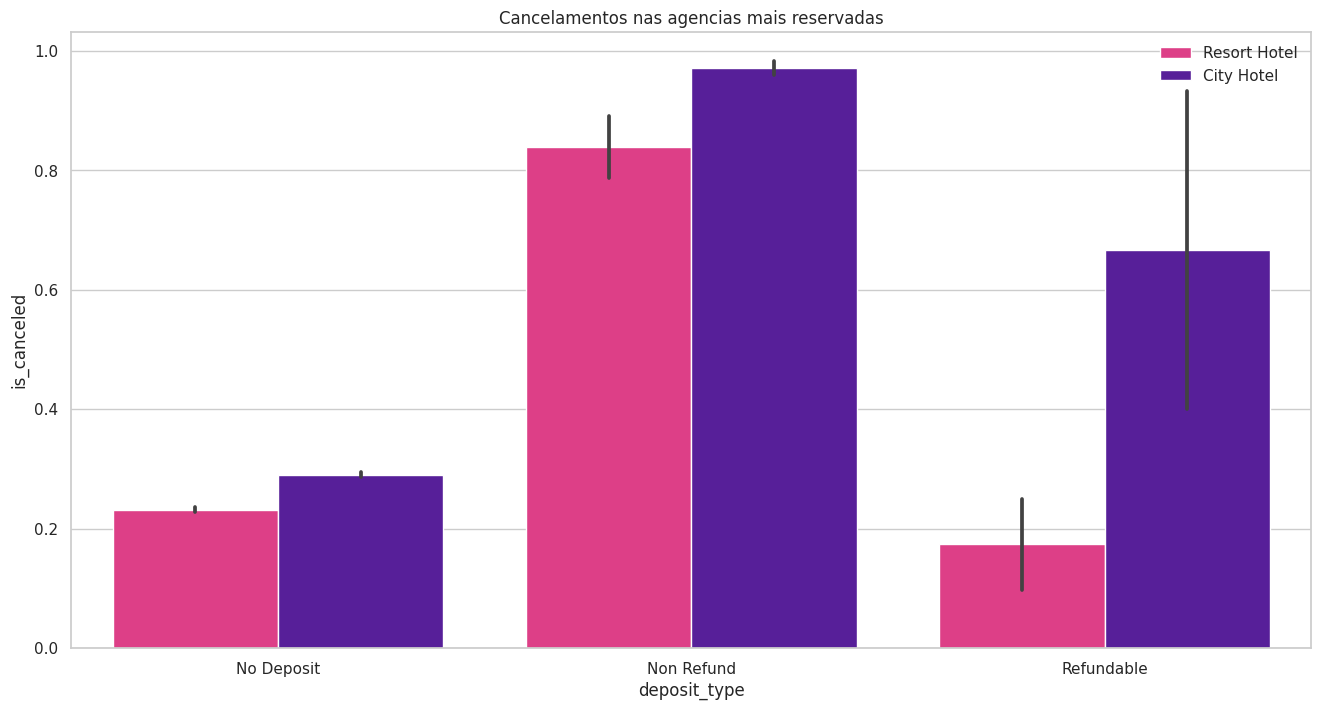

In [147]:
sns.barplot(data=data, x="deposit_type", y="is_canceled", hue="hotel")
plt.title("Cancelamentos nas agencias mais reservadas")
plt.legend(ncol=1, loc="best", frameon=False);

In [148]:
data.deposit_type.value_counts()

No Deposit    86100
Non Refund     1038
Refundable      107
Name: deposit_type, dtype: int64

**OBS:** Probably this feature has wrong values. No Refund with such high cancellation rate is quite counterintuitive.

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Days Stay</p></div>

In [129]:
data_ncanceled = data.loc[(data["is_canceled"] == 0)]
data_ncanceled = sort_month(data_ncanceled, 'arrival_date_month')

In [130]:
print('Avarage Days Stay City Hotel:',data_ncanceled.days_stay.loc[data_ncanceled['hotel']=='City Hotel'].mean())
print('Avarage Days Stay Resort Hotel:',data_ncanceled.days_stay.loc[data_ncanceled['hotel']=='Resort Hotel'].mean())

Avarage Days Stay City Hotel: 2.9846129058245388
Avarage Days Stay Resort Hotel: 4.199838343404796


**OBS:** False, on avarage people stay 2.91 days on City Hotel and 4.14 days on Resort Hotel.

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">ADR</p></div>

In [131]:
# monthly_adr = data_ncanceled.groupby(['arrival_date_month','hotel']).agg( reservations = ('arrival_date_month', 'size'),
#                                             adr_mean = ('adr', 'mean'),
#                                             days_stay_mean = ('days_stay', 'mean'),                             
#                                             people_mean = ('people', 'mean')).reset_index()

# monthly_adr = sort_month(monthly_adr, 'arrival_date_month')
# monthly_adr

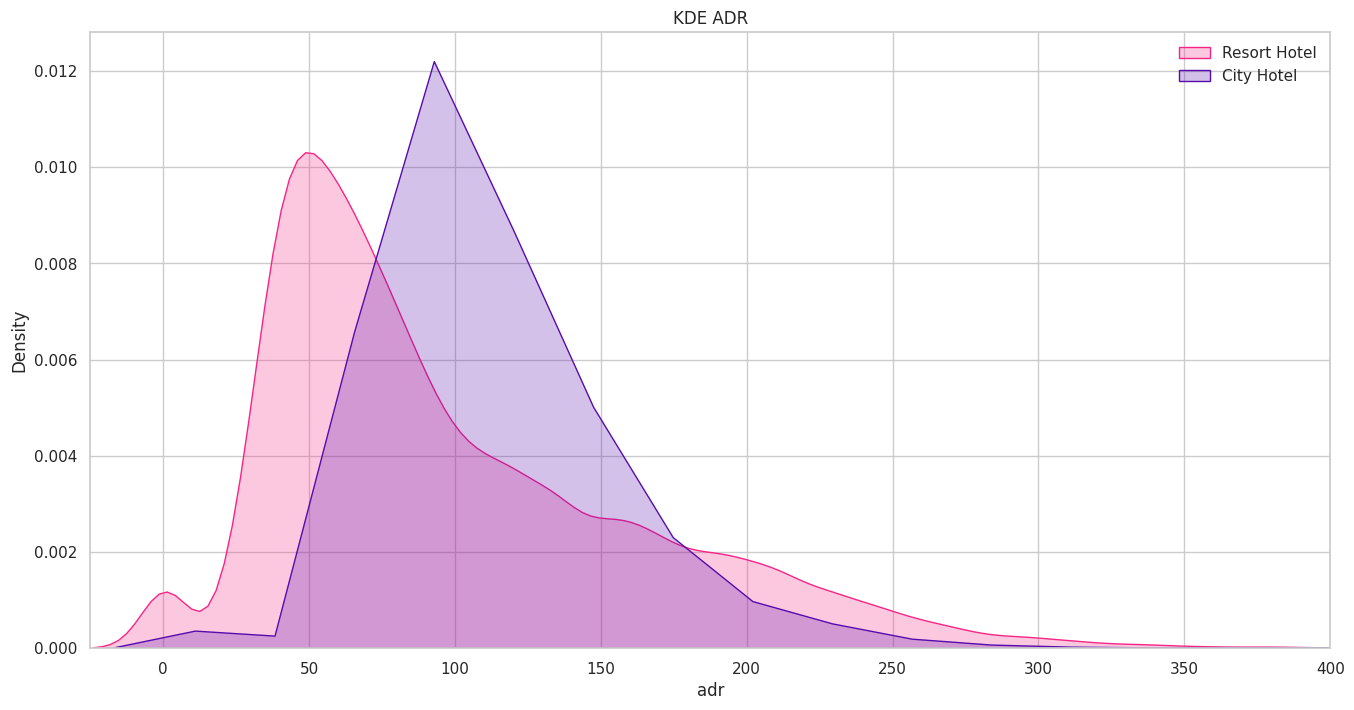

In [132]:
plt.title('KDE ADR')
sns.kdeplot(data=rh, x='adr', fill=True, label='Resort Hotel') 
sns.kdeplot(data=ch, x='adr', fill=True, label='City Hotel') 
plt.legend(ncol=1, loc="upper right", frameon=False)
plt.xlim(-25, 400);

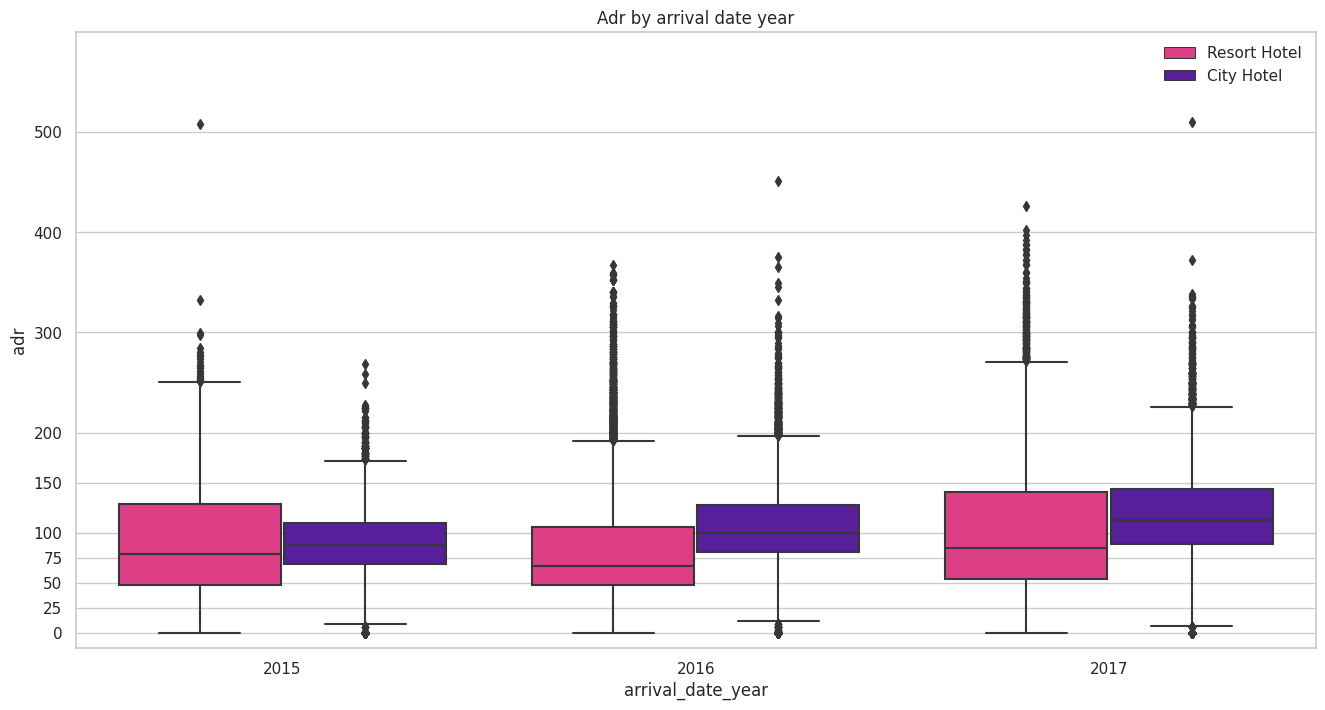

In [133]:
sns.boxplot(data=data_ncanceled, x="arrival_date_year", y="adr", hue="hotel")#, palette= 'rocket'
plt.title("Adr by arrival date year")
plt.yticks([0,25,50,75, 100,150,200,300,400,500])
plt.legend(ncol=1, loc="upper right", frameon=False);
plt.ylim(-15, 600);

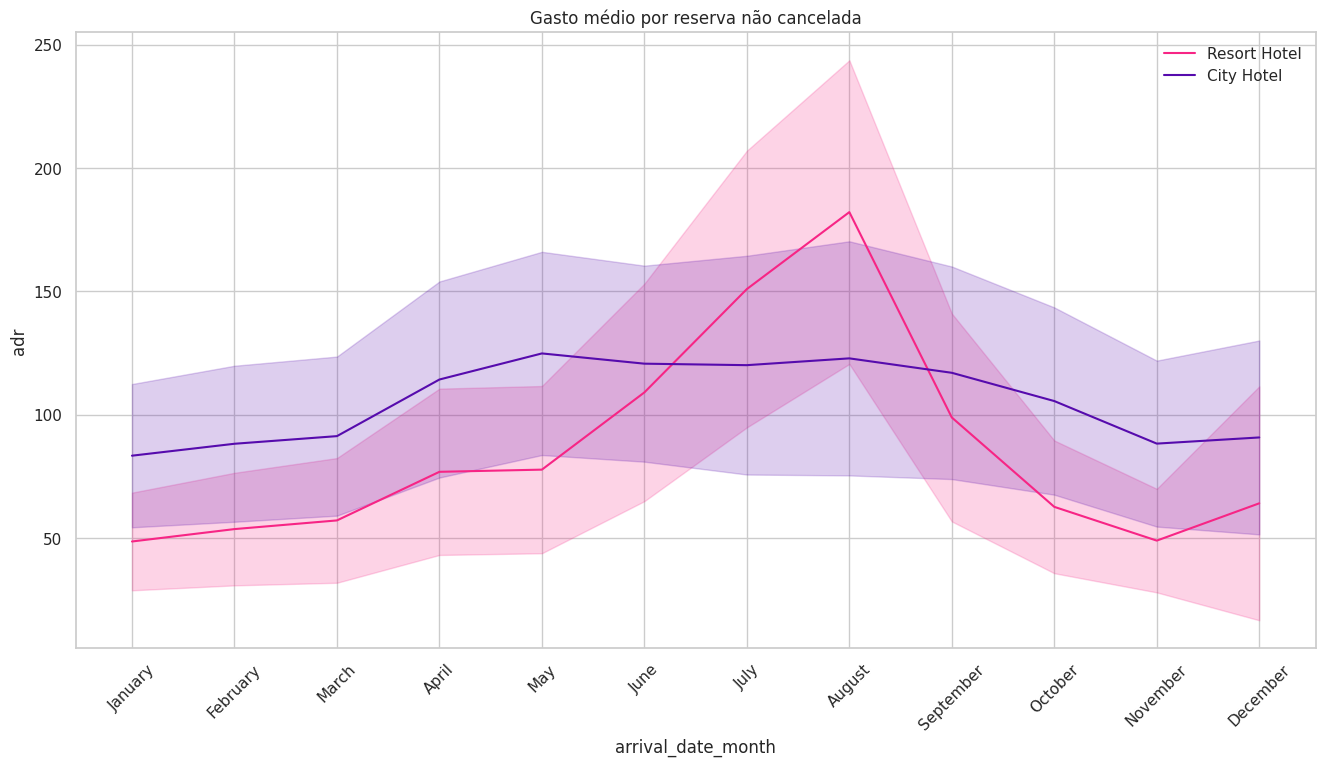

In [134]:
plt.subplots(figsize=(16,8))
sns.lineplot(data=data_ncanceled, x="arrival_date_month", y="adr", hue="hotel", errorbar="sd")
plt.title("Gasto médio por reserva não cancelada")
plt.xticks(rotation=45)
plt.legend(ncol=1, loc="upper right", frameon=False);

**H8:** False, considering that the European high season refers to the months of June, July, August and the low season to the months of November, January, February and March; on average, the cancellation rate for the city hotel was 4% lower in the low season.

## Multivariated Analysis

/tmp/ipykernel_6851/1145486551.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(data.corr(), dtype=bool)
/tmp/ipykernel_6851/1145486551.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='spearman'), linewidths=0.25,fmt=".2f", cmap="Blues", linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});


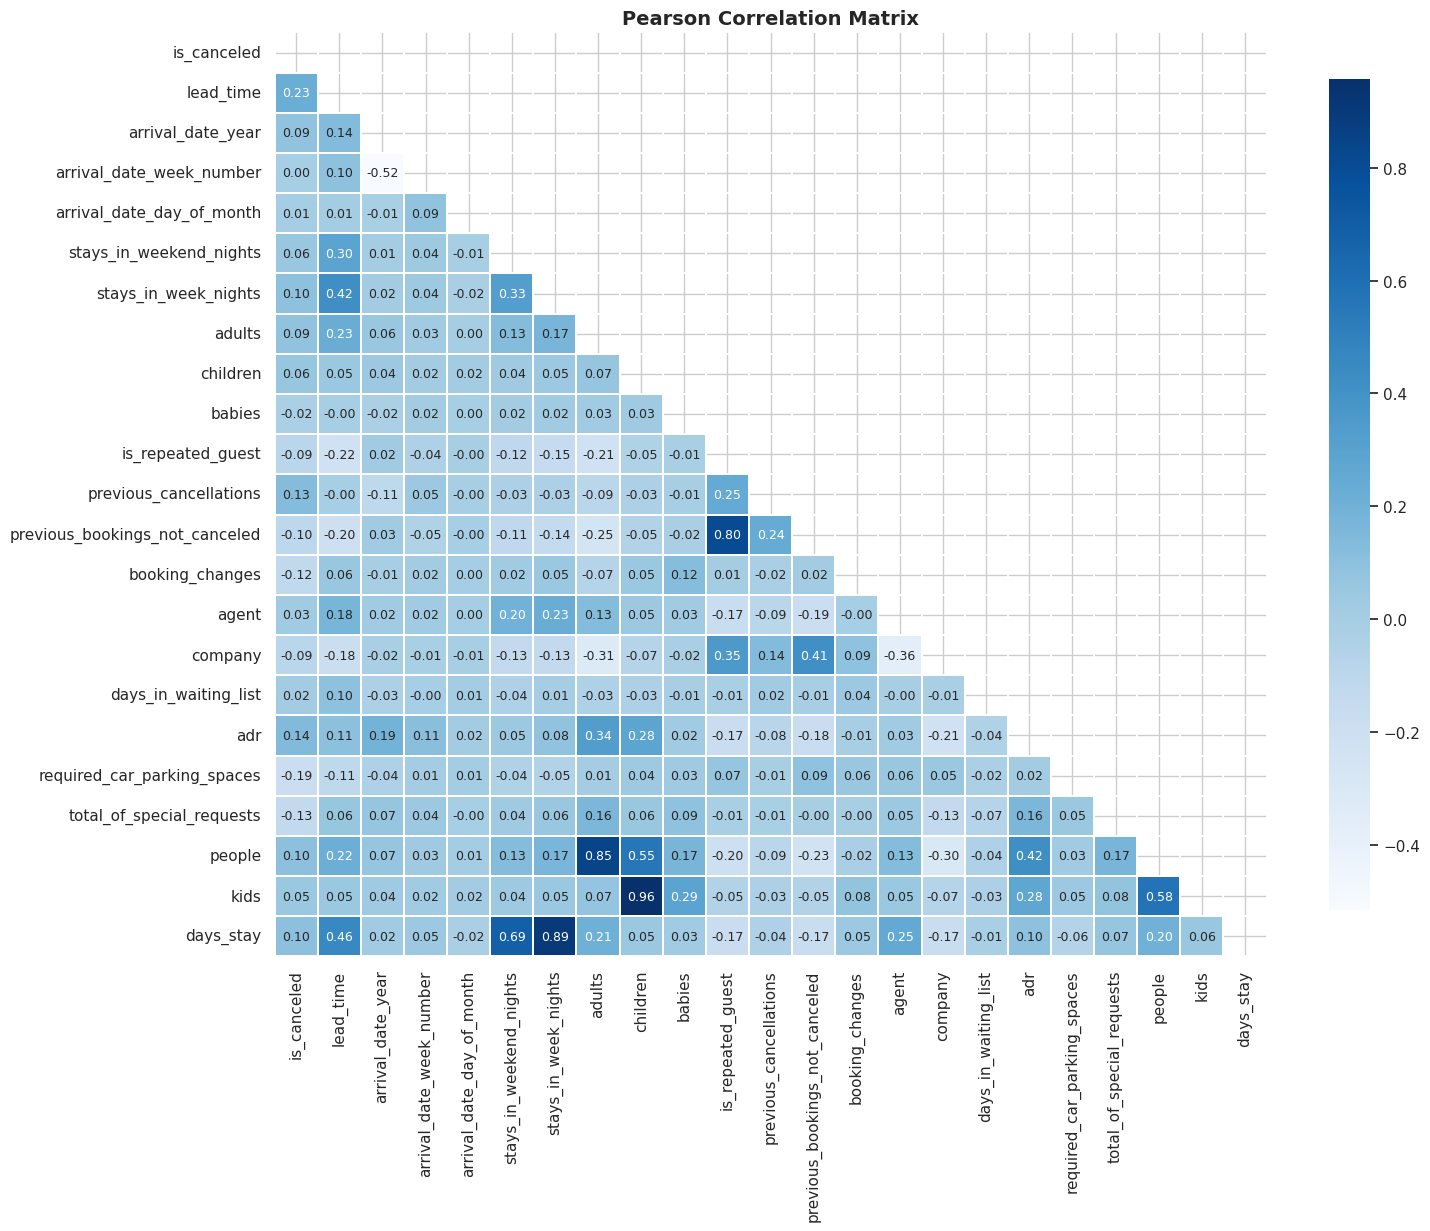

In [135]:
mask = np.zeros_like(data.corr(), dtype=bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))

plt.title('Pearson Correlation Matrix',fontsize=14, fontweight='bold')

sns.heatmap(data.corr(method='spearman'), linewidths=0.25,fmt=".2f", cmap="Blues", linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});

## <div style="color:white;display:fill;border-radius:5px;background-color:#153656;letter-spacing:0.5px;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Insights</p></div>

- O adr médio do Resort Hotel é inferior ao City Hotel, exceto na alta temporada. O que até certo ponto é contra intuítivo.
- Não há registro de cancelamento de reserva quando solicitado de vagas de estacionamento.
- Lead Time elevado não é sinonimo de cancelamento. No Resort Hotel não é tão incomum reservas agendadas a mais de um ano não serem canceladas.
- Taxa de cancelamento entre as principais agencias podem variar bastante. Seria necessário mais dados/informações para investigar os motivos.
- A Taxa de cancelamento no City Hotel é 14% maior que no Resort Hotel.
- Quanto mais requisições especiais são atendidas menor a taxa de cancelamento.